In [2]:
import numpy as np
import pandas as pd
import math
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter 
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularPredictor
from itertools import combinations
from diversity_measures import generalized_diversity, entropy_measure, KW_variance, ia_measure, difficulty_measure
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, balanced_accuracy_score

In [3]:
data = pd.read_csv('adult-income.csv')
data.replace(['?'], np.nan, inplace=True)
data.income = data.income == '>50K'

In [ ]:
data.isnull().any(axis=1).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [4]:
train_data = data.sample(frac=0.7, random_state=123)
test_data = data.drop(train_data.index)
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [ ]:
predictor2 = TabularPredictor(label='income', eval_metric='balanced_accuracy').fit(
    train_data=train_data,
    time_limit= 400,
    presets='good'
)

In [7]:
predictor2 = TabularPredictor.load("AutogluonModels/ag-20250519_131920")

In [8]:
predictor2.leaderboard()

model  score_val        eval_metric  pred_time_val  \
0                CatBoost_BAG_L2   0.813387  balanced_accuracy       5.913553   
1            WeightedEnsemble_L3   0.813387  balanced_accuracy       5.915235   
2          NeuralNetTorch_BAG_L2   0.811508  balanced_accuracy       6.153626   
3            WeightedEnsemble_L2   0.804464  balanced_accuracy       0.559399   
4           LightGBMLarge_BAG_L2   0.800603  balanced_accuracy       6.528750   
5                LightGBM_BAG_L2   0.800229  balanced_accuracy       6.102513   
6        RandomForestEntr_BAG_L2   0.799738  balanced_accuracy       6.406686   
7                 XGBoost_BAG_L1   0.799313  balanced_accuracy       0.384804   
8                 XGBoost_BAG_L2   0.799119  balanced_accuracy       6.078259   
9        RandomForestGini_BAG_L2   0.798786  balanced_accuracy       6.404413   
10               LightGBM_BAG_L1   0.798722  balanced_accuracy       0.535931   
11          LightGBMLarge_BAG_L1   0.798472  balanced_accuracy       1.204427   
12             LightGBMXT_BAG_L2   0.798222  balanced_accuracy       6.222647   
13        NeuralNetFastAI_BAG_L2   0.797183  balanced_accuracy       6.145165   
14         ExtraTreesGini_BAG_L2   0.796574  balanced_accuracy       6.433232   
15         ExtraTreesEntr_BAG_L2   0.796012  balanced_accuracy       6.447858   
16               CatBoost_BAG_L1   0.795417  balanced_accuracy       0.047965   
17             LightGBMXT_BAG_L1   0.794030  balanced_accuracy       1.195184   
18         NeuralNetTorch_BAG_L1   0.793282  balanced_accuracy       0.172400   
19        NeuralNetFastAI_BAG_L1   0.773526  balanced_accuracy       0.331286   
20       RandomForestGini_BAG_L1   0.771731  balanced_accuracy       0.517684   
21       RandomForestEntr_BAG_L1   0.769467  balanced_accuracy       0.507267   
22         ExtraTreesGini_BAG_L1   0.747086  balanced_accuracy       0.512661   
23         ExtraTreesEntr_BAG_L1   0.744957  balanced_accuracy       0.481447   
24    ExtraTreesEntr_BAG_L1_FULL        NaN  balanced_accuracy       0.481447   
25  RandomForestEntr_BAG_L1_FULL        NaN  balanced_accuracy       0.507267   
26    ExtraTreesGini_BAG_L1_FULL        NaN  balanced_accuracy       0.512661   
27  RandomForestGini_BAG_L1_FULL        NaN  balanced_accuracy       0.517684   
28           XGBoost_BAG_L2_FULL        NaN  balanced_accuracy            NaN   
29           XGBoost_BAG_L1_FULL        NaN  balanced_accuracy            NaN   
30      WeightedEnsemble_L3_FULL        NaN  balanced_accuracy            NaN   
31      WeightedEnsemble_L2_FULL        NaN  balanced_accuracy            NaN   
32  RandomForestGini_BAG_L2_FULL        NaN  balanced_accuracy            NaN   
33  RandomForestEntr_BAG_L2_FULL        NaN  balanced_accuracy            NaN   
34    NeuralNetTorch_BAG_L2_FULL        NaN  balanced_accuracy            NaN   
35    NeuralNetTorch_BAG_L1_FULL        NaN  balanced_accuracy            NaN   
36   NeuralNetFastAI_BAG_L2_FULL        NaN  balanced_accuracy            NaN   
37   NeuralNetFastAI_BAG_L1_FULL        NaN  balanced_accuracy            NaN   
38          LightGBM_BAG_L2_FULL        NaN  balanced_accuracy            NaN   
39          LightGBM_BAG_L1_FULL        NaN  balanced_accuracy            NaN   
40        LightGBMXT_BAG_L2_FULL        NaN  balanced_accuracy            NaN   
41        LightGBMXT_BAG_L1_FULL        NaN  balanced_accuracy            NaN   
42     LightGBMLarge_BAG_L2_FULL        NaN  balanced_accuracy            NaN   
43     LightGBMLarge_BAG_L1_FULL        NaN  balanced_accuracy            NaN   
44    ExtraTreesGini_BAG_L2_FULL        NaN  balanced_accuracy            NaN   
45    ExtraTreesEntr_BAG_L2_FULL        NaN  balanced_accuracy            NaN   
46          CatBoost_BAG_L2_FULL        NaN  balanced_accuracy            NaN   
47          CatBoost_BAG_L1_FULL        NaN  balanced_accuracy            NaN   

      fit_time  pred_time_val_marginal  fit_time_marginal

In [10]:
model_names = predictor2.model_names()
model_names.pop(model_names.index('WeightedEnsemble_L2_FULL')) 
model_names.pop(model_names.index('WeightedEnsemble_L3_FULL')) 
mdls = model_names[24:]

In [11]:
mdls

['LightGBMXT_BAG_L1_FULL',
 'LightGBM_BAG_L1_FULL',
 'RandomForestGini_BAG_L1_FULL',
 'RandomForestEntr_BAG_L1_FULL',
 'CatBoost_BAG_L1_FULL',
 'ExtraTreesGini_BAG_L1_FULL',
 'ExtraTreesEntr_BAG_L1_FULL',
 'NeuralNetFastAI_BAG_L1_FULL',
 'XGBoost_BAG_L1_FULL',
 'NeuralNetTorch_BAG_L1_FULL',
 'LightGBMLarge_BAG_L1_FULL',
 'LightGBMXT_BAG_L2_FULL',
 'LightGBM_BAG_L2_FULL',
 'RandomForestGini_BAG_L2_FULL',
 'RandomForestEntr_BAG_L2_FULL',
 'CatBoost_BAG_L2_FULL',
 'ExtraTreesGini_BAG_L2_FULL',
 'ExtraTreesEntr_BAG_L2_FULL',
 'NeuralNetFastAI_BAG_L2_FULL',
 'XGBoost_BAG_L2_FULL',
 'NeuralNetTorch_BAG_L2_FULL',
 'LightGBMLarge_BAG_L2_FULL']

In [12]:
comb5 = list(combinations(mdls, 5))
num = [i for i in range(22)]
comb_num = list(combinations(num, 5))  

In [ ]:
# zapisanie predykcji pstwa i predykcji 0 1
pred_prob = []
pred = []
for mdl in mdls:
    pred_prob.append(predictor2.predict_proba(test_data.drop('income', axis = 1), model=mdl).to_numpy())
    p1 = predictor2.predict(test_data.drop('income', axis = 1), model=mdl).to_numpy()
    pred.append(p1)

In [ ]:
# głosowanie
pred_t = [list(i) for i in zip(*pred)]
res = [[] for i in range (len(comb_num))]
for i in range(len(comb_num)):
    for j in range (len(test_data.income)):
        if sum([pred_t[j][comb_num[i][0]], pred_t[j][comb_num[i][1]], pred_t[j][comb_num[i][2]], pred_t[j][comb_num[i][3]], pred_t[j][comb_num[i][4]]]) > 2:
            res[i].append(1)
        else:
            res[i].append(0)

In [ ]:
with open("pred_prob1905", "wb") as fp:   #Pickling
    pickle.dump(pred_prob, fp)

In [13]:
with open("pred_prob1905", "rb") as fp:   # Unpickling
    pred_prob = pickle.load(fp)
    
with open("pred1905", "rb") as fp:   # Unpickling
    pred = pickle.load(fp)

with open("res", "rb") as fp:   # Unpickling
    res = pickle.load(fp)

In [ ]:
# zapisanie wartości miar dla komitetów
entropy_results = []
KW_results = []
ia_results = []
diff_results = []
gd_results = []

for i in range(len(comb_num)): 
    gd_results.append(generalized_diversity(test_data.income, 0.5, pred_prob[comb_num[i][0]], pred_prob[comb_num[i][1]], pred_prob[comb_num[i][2]], pred_prob[comb_num[i][3]], pred_prob[comb_num[i][4]]))
    entropy_results.append(entropy_measure(test_data.income, 0.5, pred_prob[comb_num[i][0]], pred_prob[comb_num[i][1]], pred_prob[comb_num[i][2]], pred_prob[comb_num[i][3]], pred_prob[comb_num[i][4]]))
    KW_results.append(KW_variance(test_data.income, 0.5, pred_prob[comb_num[i][0]], pred_prob[comb_num[i][1]], pred_prob[comb_num[i][2]], pred_prob[comb_num[i][3]], pred_prob[comb_num[i][4]]))
    ia_results.append(ia_measure(test_data.income, 0.5, pred_prob[comb_num[i][0]], pred_prob[comb_num[i][1]], pred_prob[comb_num[i][2]], pred_prob[comb_num[i][3]], pred_prob[comb_num[i][4]]))
    diff_results.append(difficulty_measure(test_data.income, 0.5, pred_prob[comb_num[i][0]], pred_prob[comb_num[i][1]], pred_prob[comb_num[i][2]], pred_prob[comb_num[i][3]], pred_prob[comb_num[i][4]]))
 

In [11]:
# zapisanie wartosci metryk dla pojedynczych modeli
scores_indiv = []
for i in range(len(mdls)):
    scores_indiv.append([accuracy_score(test_data.income,pred[i]), recall_score(test_data.income,pred[i]),precision_score(test_data.income,pred[i]), roc_auc_score(test_data.income,pred_prob[i][:, 1]), balanced_accuracy_score(test_data.income,pred[i])])

df_indiv = pd.DataFrame(scores_indiv)
df_indiv = df_indiv.rename(columns={0: "acc", 1: "recall", 2: "prec", 3:'auc', 4: 'bal_acc'})

In [ ]:
# zapisanie pstwa dla komitetów
prob_ens = []
for i in range (len(comb_num)):
    prob_ens.append(np.mean([pred_prob[comb_num[i][0]][:, 1], pred_prob[comb_num[i][1]][:, 1], pred_prob[comb_num[i][2]][:, 1],pred_prob[comb_num[i][3]][:, 1], pred_prob[comb_num[i][4]][:, 1]], axis = 0))

In [78]:
# zapisanie wartości metryk dla komitetow
scores = []
for i in range (len(comb_num)):
    scores.append([accuracy_score(test_data.income,res[i]), recall_score(test_data.income,res[i]),precision_score(test_data.income,res[i]), roc_auc_score(test_data.income, prob_ens[i]), balanced_accuracy_score(test_data.income,res[i])])

### Relationship between committee quality and measure of diversity

In [14]:
with open("entropy_res", "rb") as fp:   # Unpickling
    entropy_results = pickle.load(fp)

with open("ia_res", "rb") as fp:   # Unpickling
    ia_results = pickle.load(fp)

with open("kw_res", "rb") as fp:   # Unpickling
    kw_results = pickle.load(fp)

with open("diff_res", "rb") as fp:   # Unpickling
    diff_results = pickle.load(fp)

with open("gd_res", "rb") as fp:   # Unpickling
    gd_results = pickle.load(fp)

with open("scores", "rb") as fp:   # Unpickling
    scores = pickle.load(fp)

In [15]:
df1 = pd.DataFrame(scores)
df1['gd'] = gd_results
df1['entropy'] = entropy_results
df1['ia'] = ia_results
df1['kw'] = kw_results
df1['diffi'] = diff_results
df1 = df1.rename(columns={0: "acc", 1: "recall", 2: "prec", 3:'auc', 4: 'bal_acc'})

Generalized diversity przyjmuje wartości w przedziale [0, 1]. Największa róznorodność gdy gd = 1
minimalna warość gd: 0.035 , maksymalna wartość gd: 0.175
min róznorodność, max


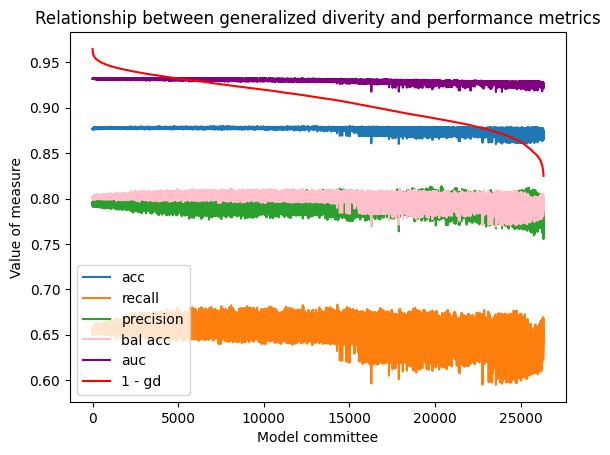

In [13]:
df2 = df1.sort_values(by='gd').reset_index(drop=True)
print('Generalized diversity przyjmuje wartości w przedziale [0, 1]. Największa róznorodność gdy gd = 1')
print('minimalna warość gd:', round(min(df2.gd), 3), ', maksymalna wartość gd:', round(max(df2.gd), 3))
print('min róznorodność, max')

plt.plot(df2.acc, label='acc')
plt.plot(df2.recall, label='recall')
plt.plot(df2.prec, label='precision')
plt.plot(df2.bal_acc, label='bal acc', color = 'pink')
plt.plot(df2.auc, label='auc', color = 'purple')
plt.plot(1 - df2.gd, label="1 - gd", color='red')

plt.title("Relationship between generalized diverity and performance metrics")
plt.xlabel("Model committee")
plt.ylabel("Value of measure")
plt.legend()
plt.show()

Entropy measure przyjmuje wartości w przedziale [0, 1]. Największa róznorodność gdy entropy = 1
minimalna warość Entropy: 0.017 , maksymalna wartość Entropy: 0.087


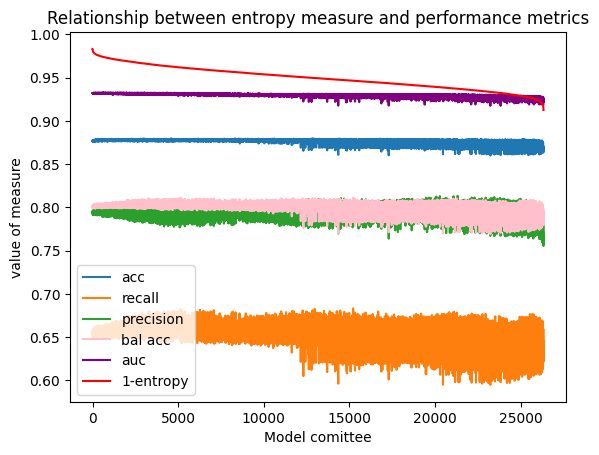

In [142]:
df2 = df1.sort_values(by='entropy').reset_index(drop=True)

print('Entropy measure przyjmuje wartości w przedziale [0, 1]. Największa róznorodność gdy entropy = 1')
print('minimalna warość Entropy:', round(min(df2.entropy), 3), ', maksymalna wartość Entropy:', round(max(df2.entropy), 3))

plt.plot(df2.acc, label='acc')
plt.plot(df2.recall, label='recall')
plt.plot(df2.prec, label='precision')
plt.plot(df2.bal_acc, label='bal acc', color = 'pink')
plt.plot(df2.auc, label='auc', color = 'purple')
plt.plot(1-df2.entropy, label = "1-entropy", color = 'red')

plt.title("Relationship between entropy measure and performance metrics")
plt.xlabel("Model comittee")
plt.ylabel("value of measure")
plt.legend()
plt.show()

# entropy wartoswi w [0,1], +

Interrater agreement przyjmuje wartości w przedziale [-1, 1]. Największa róznorodność gdy ia = -1
minimalna warość ia: 0.963 , maksymalna wartość ia: 0.993


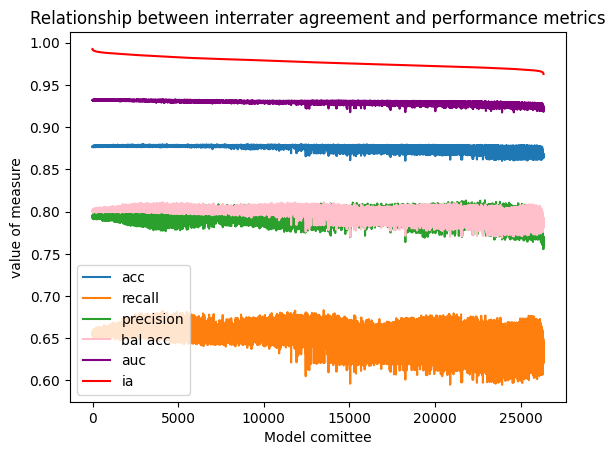

In [145]:
df2 = df1.sort_values(by='ia', ascending=False).reset_index(drop=True)

print('Interrater agreement przyjmuje wartości w przedziale [-1, 1]. Największa róznorodność gdy ia = -1')
print('minimalna warość ia:', round(min(df2.ia), 3), ', maksymalna wartość ia:', round(max(df2.ia), 3))

plt.plot(df2.acc, label='acc')
plt.plot(df2.recall, label='recall')
plt.plot(df2.prec, label='precision')
plt.plot(df2.bal_acc, label='bal acc', color = 'pink')
plt.plot(df2.auc, label='auc', color = 'purple')
plt.plot(df2.ia, label = "ia", color = 'red')

plt.title("Relationship between interrater agreement and performance metrics")
plt.xlabel("Model comittee")
plt.ylabel("value of measure")
plt.legend()
plt.show()
#ia wartości w [-1, 1], -

KW variance przyjmuje wartości w przedziale [0, 1]. Największa róznorodność gdy kw = 1
minimalna warość kw: 0.005 , maksymalna wartość kw: 0.023


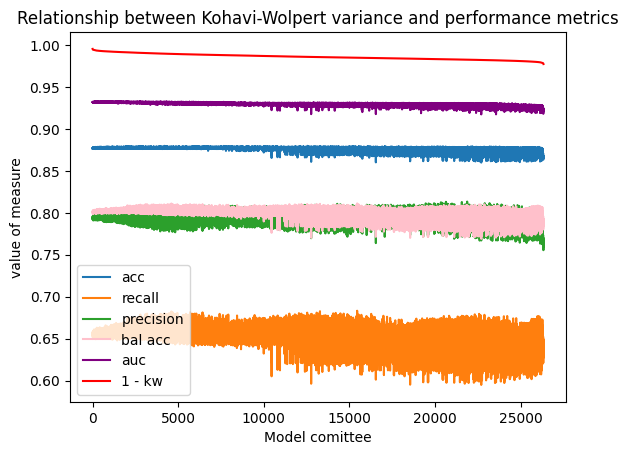

In [147]:
df2 = df1.sort_values(by='kw').reset_index(drop=True)

print('KW variance przyjmuje wartości w przedziale [0, 1]. Największa róznorodność gdy kw = 1')
print('minimalna warość kw:', round(min(df2.kw), 3), ', maksymalna wartość kw:', round(max(df2.kw), 3))

plt.plot(df2.acc, label='acc')
plt.plot(df2.recall, label='recall')
plt.plot(df2.prec, label='precision')
plt.plot(df2.bal_acc, label='bal acc', color = 'pink')
plt.plot(df2.auc, label='auc', color = 'purple')
plt.plot(1-df2.kw, label = "1 - kw", color = 'red')

plt.title("Relationship between Kohavi-Wolpert variance and performance metrics")
plt.xlabel("Model comittee")
plt.ylabel("value of measure")
plt.legend()
plt.show()
# kw wartości w [0,1] +

Measure of difficulty przyjmuje wartości w przedziale [0, inf). Największa róznorodność gdy diff = 0
minimalna warość diff: 0.093 , maksymalna wartość diff: 0.107


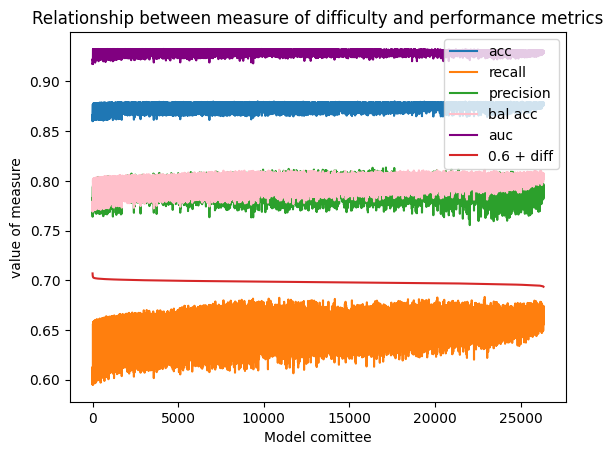

In [148]:
df2 = df1.sort_values(by='diffi', ascending=False).reset_index(drop=True)
print('Measure of difficulty przyjmuje wartości w przedziale [0, inf). Największa róznorodność gdy diff = 0')
print('minimalna warość diff:', round(min(df2.diffi), 3), ', maksymalna wartość diff:', round(max(df2.diffi), 3))

plt.plot(df2.acc, label='acc')
plt.plot(df2.recall, label='recall')
plt.plot(df2.prec, label='precision')
plt.plot(df2.bal_acc, label='bal acc', color = 'pink')
plt.plot(df2.auc, label='auc', color = 'purple')
plt.plot(0.6+df2.diffi, label = "0.6 + diff")

plt.legend()
plt.title("Relationship between measure of difficulty and performance metrics")
plt.xlabel("Model comittee")
plt.ylabel("value of measure")
plt.show()
# difficulty wartosci w [0 , inf), -

In [15]:
result = [comb_num[i] for i in ids_acc]
result

[(1, 8, 9, 20, 21),
 (1, 8, 18, 20, 21),
 (8, 15, 18, 20, 21),
 (8, 12, 18, 20, 21),
 (7, 8, 12, 18, 21),
 (7, 8, 12, 15, 20),
 (8, 12, 15, 18, 20),
 (7, 8, 15, 20, 21),
 (7, 8, 12, 20, 21),
 (1, 7, 8, 18, 21),
 (7, 8, 12, 15, 18),
 (1, 7, 8, 18, 19),
 (1, 8, 18, 19, 21),
 (4, 8, 9, 11, 12),
 (4, 11, 12, 15, 18),
 (1, 5, 8, 18, 21),
 (1, 8, 9, 12, 20),
 (7, 12, 13, 15, 18),
 (7, 14, 18, 19, 21),
 (1, 3, 8, 18, 21),
 (8, 18, 19, 20, 21),
 (4, 8, 11, 12, 18),
 (4, 8, 9, 12, 18),
 (4, 8, 18, 20, 21),
 (8, 9, 12, 15, 18),
 (7, 12, 13, 18, 21),
 (7, 8, 13, 18, 21),
 (7, 8, 15, 18, 21),
 (2, 8, 15, 20, 21),
 (1, 12, 18, 20, 21),
 (7, 8, 18, 19, 21),
 (1, 6, 8, 18, 21),
 (1, 2, 8, 18, 21),
 (4, 8, 11, 12, 20),
 (1, 12, 15, 16, 20),
 (7, 12, 14, 18, 21),
 (6, 8, 18, 19, 21),
 (8, 9, 18, 19, 21),
 (7, 8, 19, 20, 21),
 (1, 12, 18, 19, 21),
 (1, 8, 9, 18, 21),
 (1, 7, 8, 20, 21),
 (7, 8, 15, 18, 20),
 (1, 8, 12, 20, 21),
 (1, 2, 18, 19, 21),
 (3, 8, 15, 20, 21),
 (7, 12, 13, 15, 20),
 (1, 2, 8, 1

### Heatmaps

In [16]:
# 3% komitetów które osiągnęły największą wartość gd(indeksy)
ids_gd_max = df1.sort_values(by = 'gd', ascending=False).head(math.ceil(len(df1)*0.03)).index.to_list()
# wybranie tych komiteow
result_gd_max = [comb_num[i] for i in ids_gd_max]

matrix_gd_max = np.zeros((22, 22), dtype=int)

for group in result_gd_max:
    for i in group:
        for j in group:
            if i != j:
                matrix_gd_max[i][j] += 1

# np.fill_diagonal(matrix_gd, 0)
# matrix_gd[np.triu_indices_from(matrix_gd, k=1)] = 0

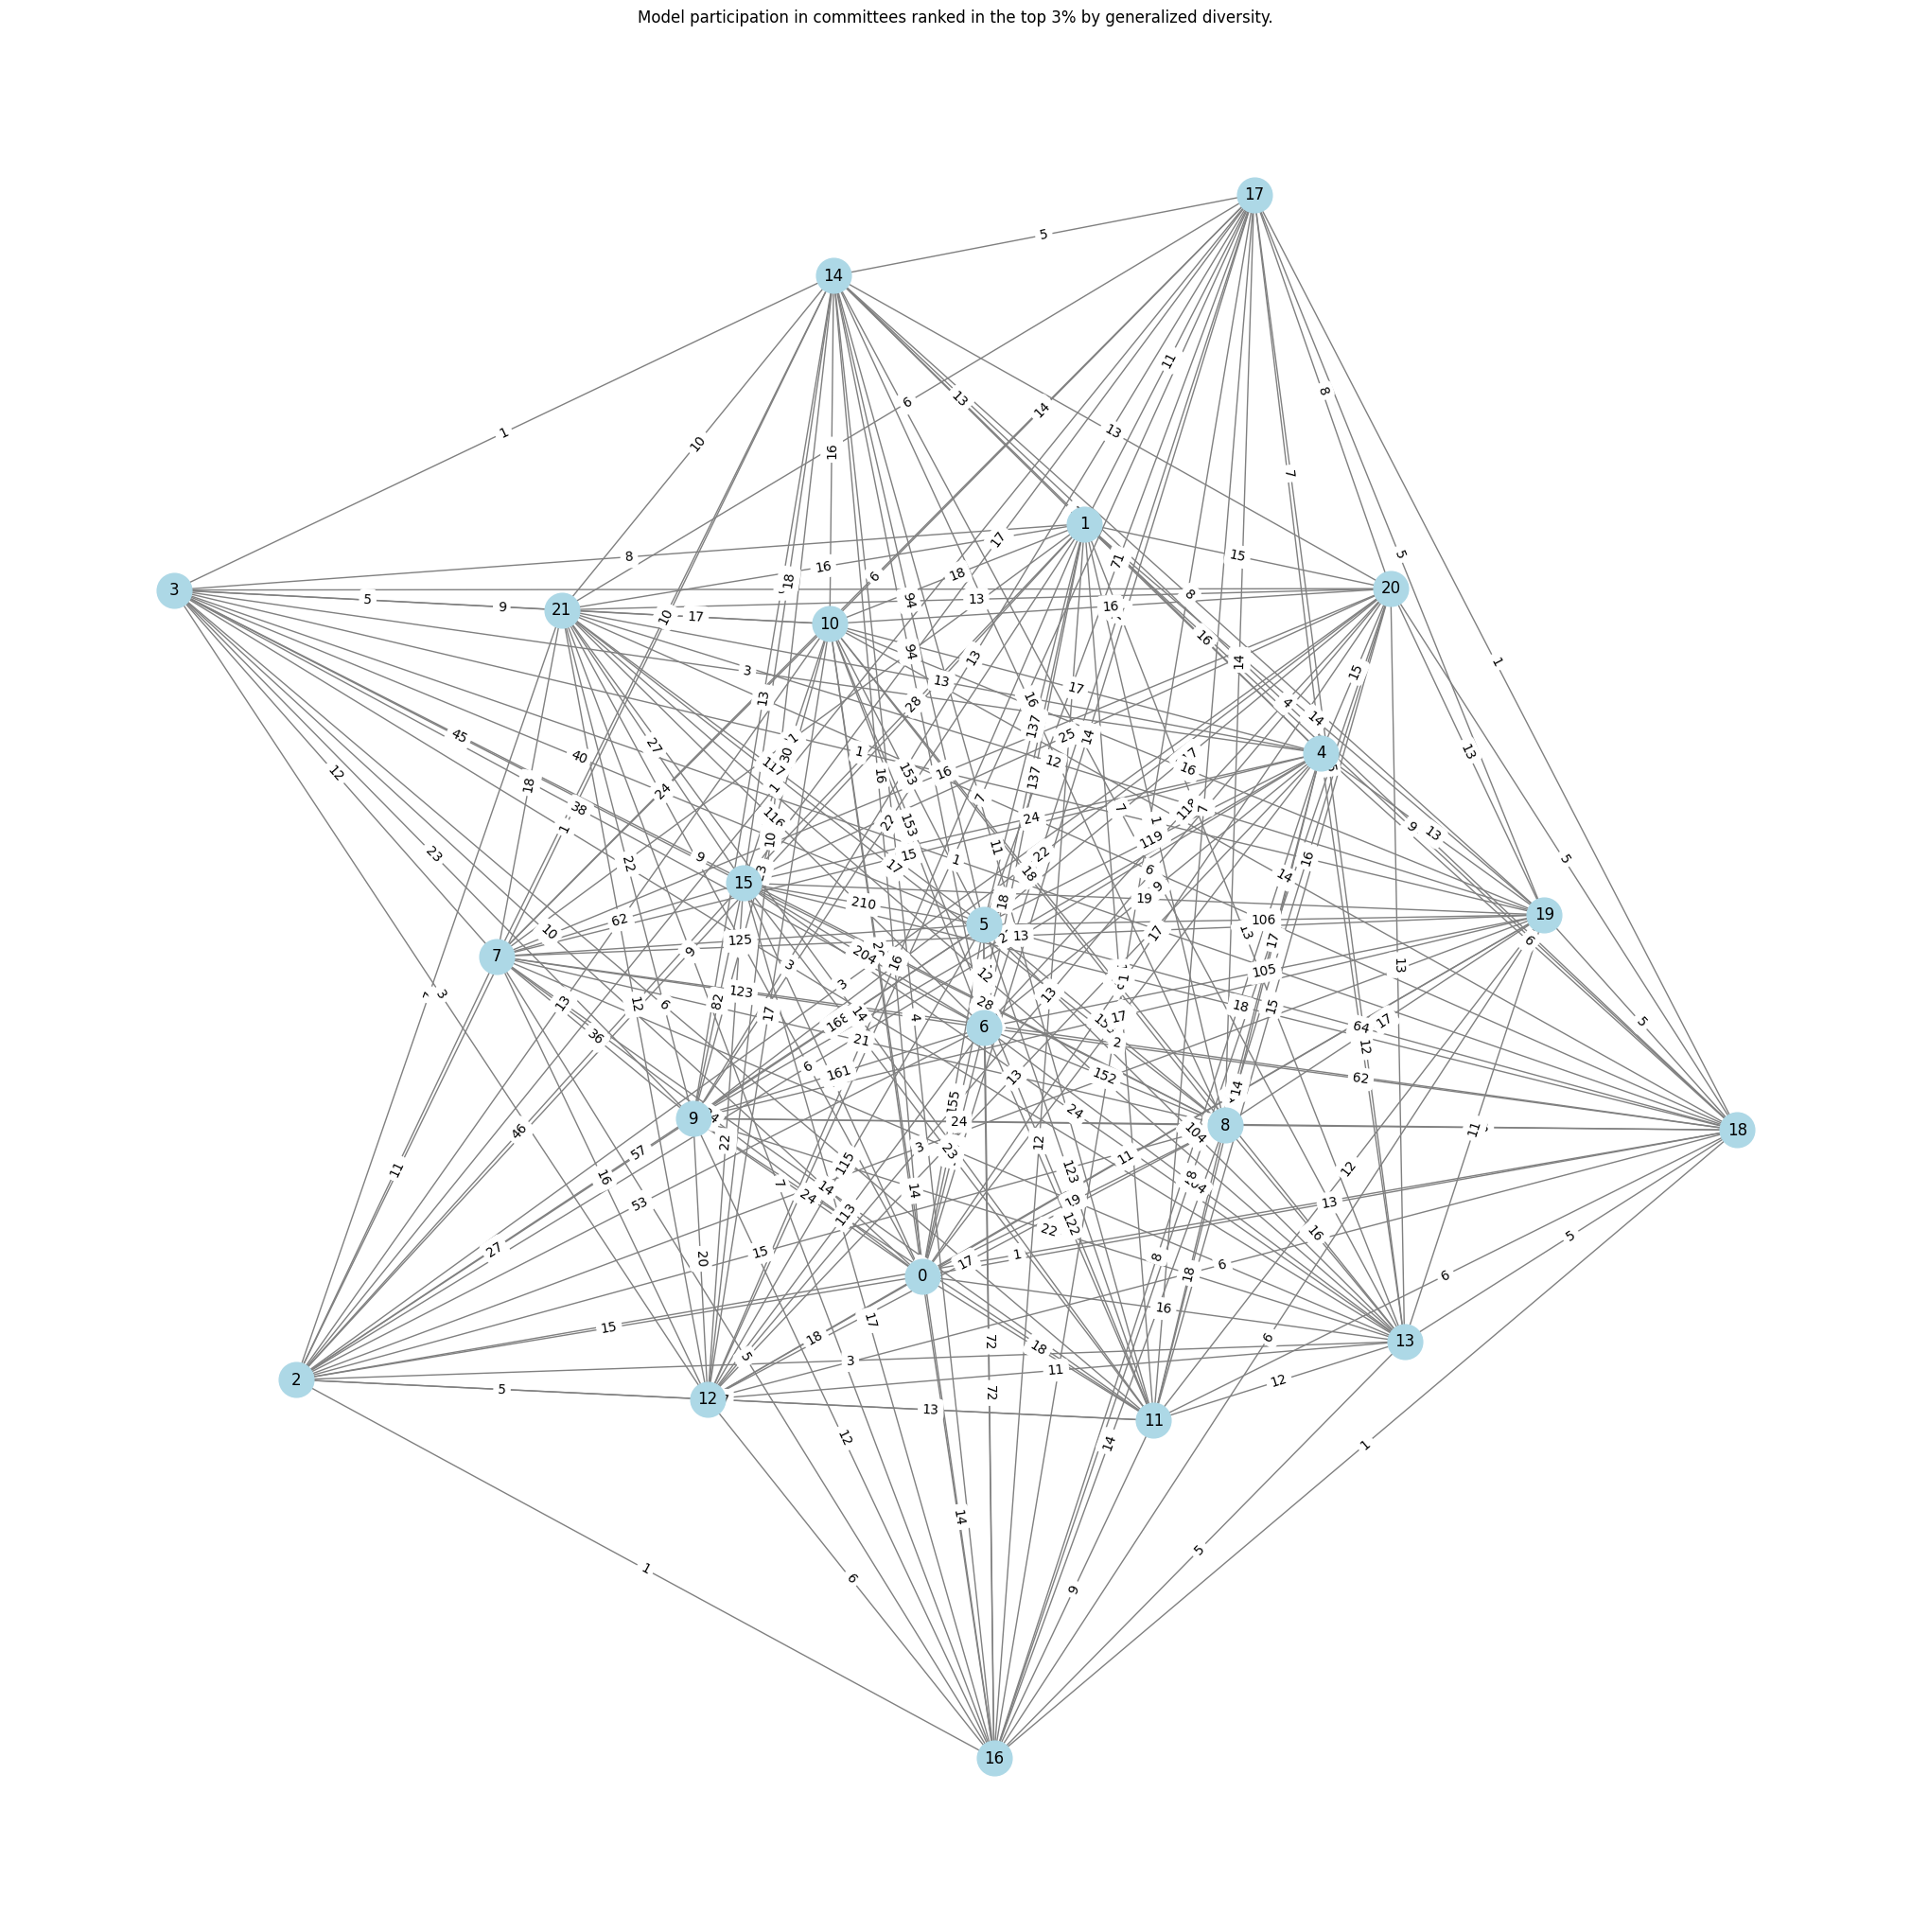

In [ ]:
import networkx as nx

# Create a graph from the adjacency matrix
G = nx.from_numpy_array(matrix_gd_max)

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes

plt.figure(figsize=(20, 20))
# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, edge_color='gray')

# Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show plot
plt.title("Model participation in committees ranked in the top 3% by generalized diversity.")
plt.show()


In [17]:
# 3% komitetów które osiągnęły najmniejszą wartość gd(indeksy)
ids_gd_min = df1.sort_values(by = 'gd', ascending=True).head(math.ceil(len(df1)*0.03)).index.to_list()
# wybranie tych komiteow
result_gd_min = [comb_num[i] for i in ids_gd_min]

matrix_gd_min = np.zeros((22, 22), dtype=int)

for group in result_gd_min:
    for i in group:
        for j in group:
            if i != j:
                matrix_gd_min[i][j] += 1


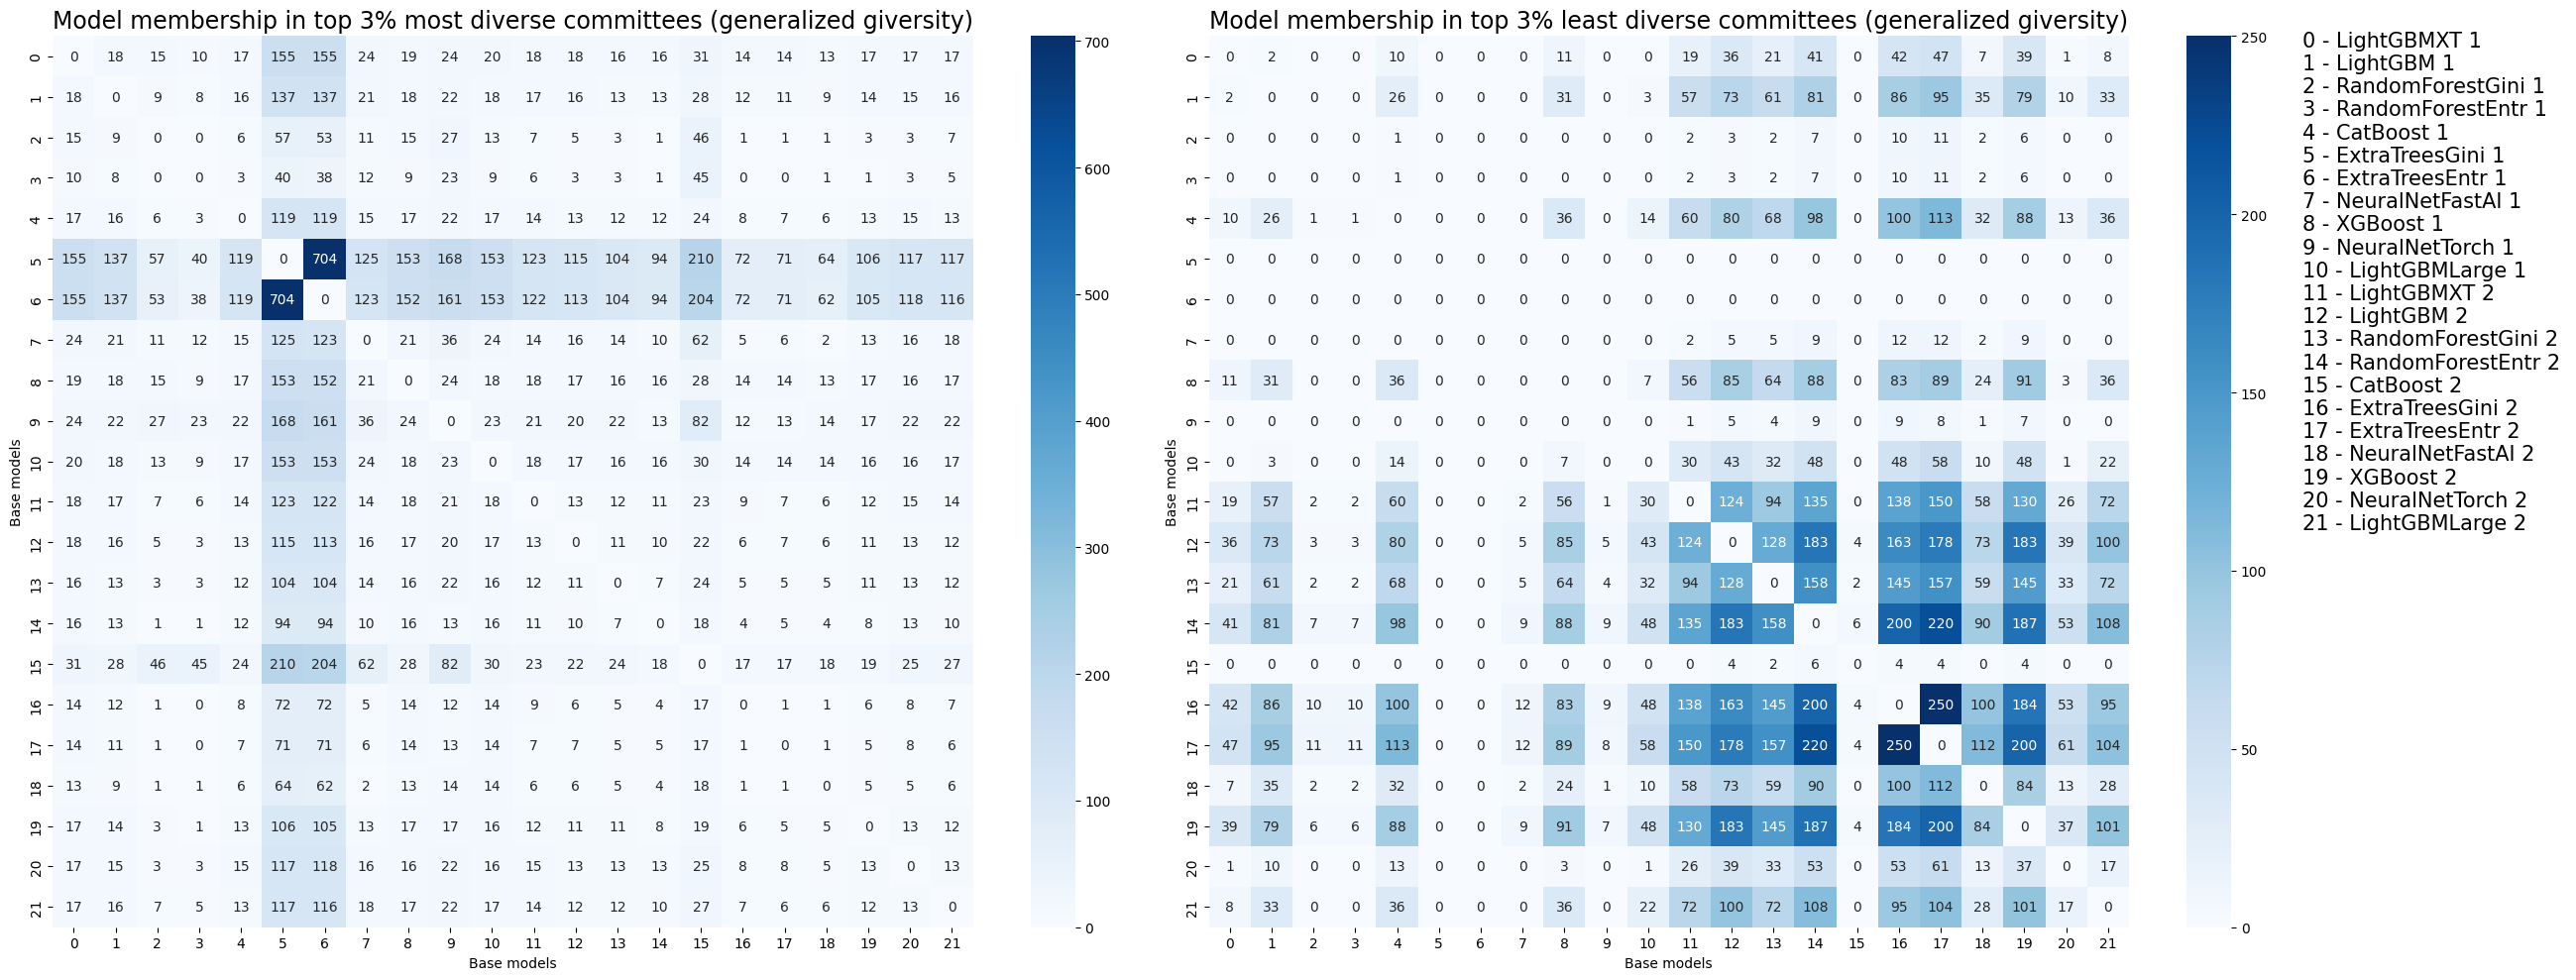

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(24, 10))  # 1 row, 2 columns

ax2 = sns.heatmap(matrix_gd_min, annot=True, fmt='g', cmap="Blues", ax=axes[1])
ax2.set(xlabel="Base models", ylabel="Base models")
ax2.set_title('Model membership in top 3% least diverse committees (generalized giversity)', fontsize=17)

ax1 = sns.heatmap(matrix_gd_max, annot=True, fmt='g', cmap="Blues", ax=axes[0])
ax1.set(xlabel="Base models", ylabel="Base models")
ax1.set_title('Model membership in top 3% most diverse committees (generalized giversity)', fontsize=17)

tekst = '0 - LightGBMXT 1 \n1 - LightGBM 1 \n2 - RandomForestGini 1 \n3 - RandomForestEntr 1 \n4 - CatBoost 1 \n5 - ExtraTreesGini 1 \n6 - ExtraTreesEntr 1 \n7 - NeuralNetFastAI 1 \n8 - XGBoost 1 \n9 - NeuralNetTorch 1 \n10 - LightGBMLarge 1 \n11 - LightGBMXT 2 \n12 - LightGBM 2 \n13 - RandomForestGini 2 \n14 - RandomForestEntr 2 \n15 - CatBoost 2 \n16 - ExtraTreesGini 2 \n17 - ExtraTreesEntr 2 \n18 - NeuralNetFastAI 2 \n19 - XGBoost 2 \n20 - NeuralNetTorch 2 \n21 - LightGBMLarge 2'
fig.text(0.97, 0.46, tekst, fontsize=15)
plt.tight_layout()
plt.show()

In [208]:
non_zero_rows = ~np.all(matrix_gd_min == 0, axis=1)
non_zero_cols = ~np.all(matrix_gd_min == 0, axis=0)

# Filter the matrix
matrix_gd_min_n = matrix_gd_min[non_zero_rows][:, non_zero_cols]

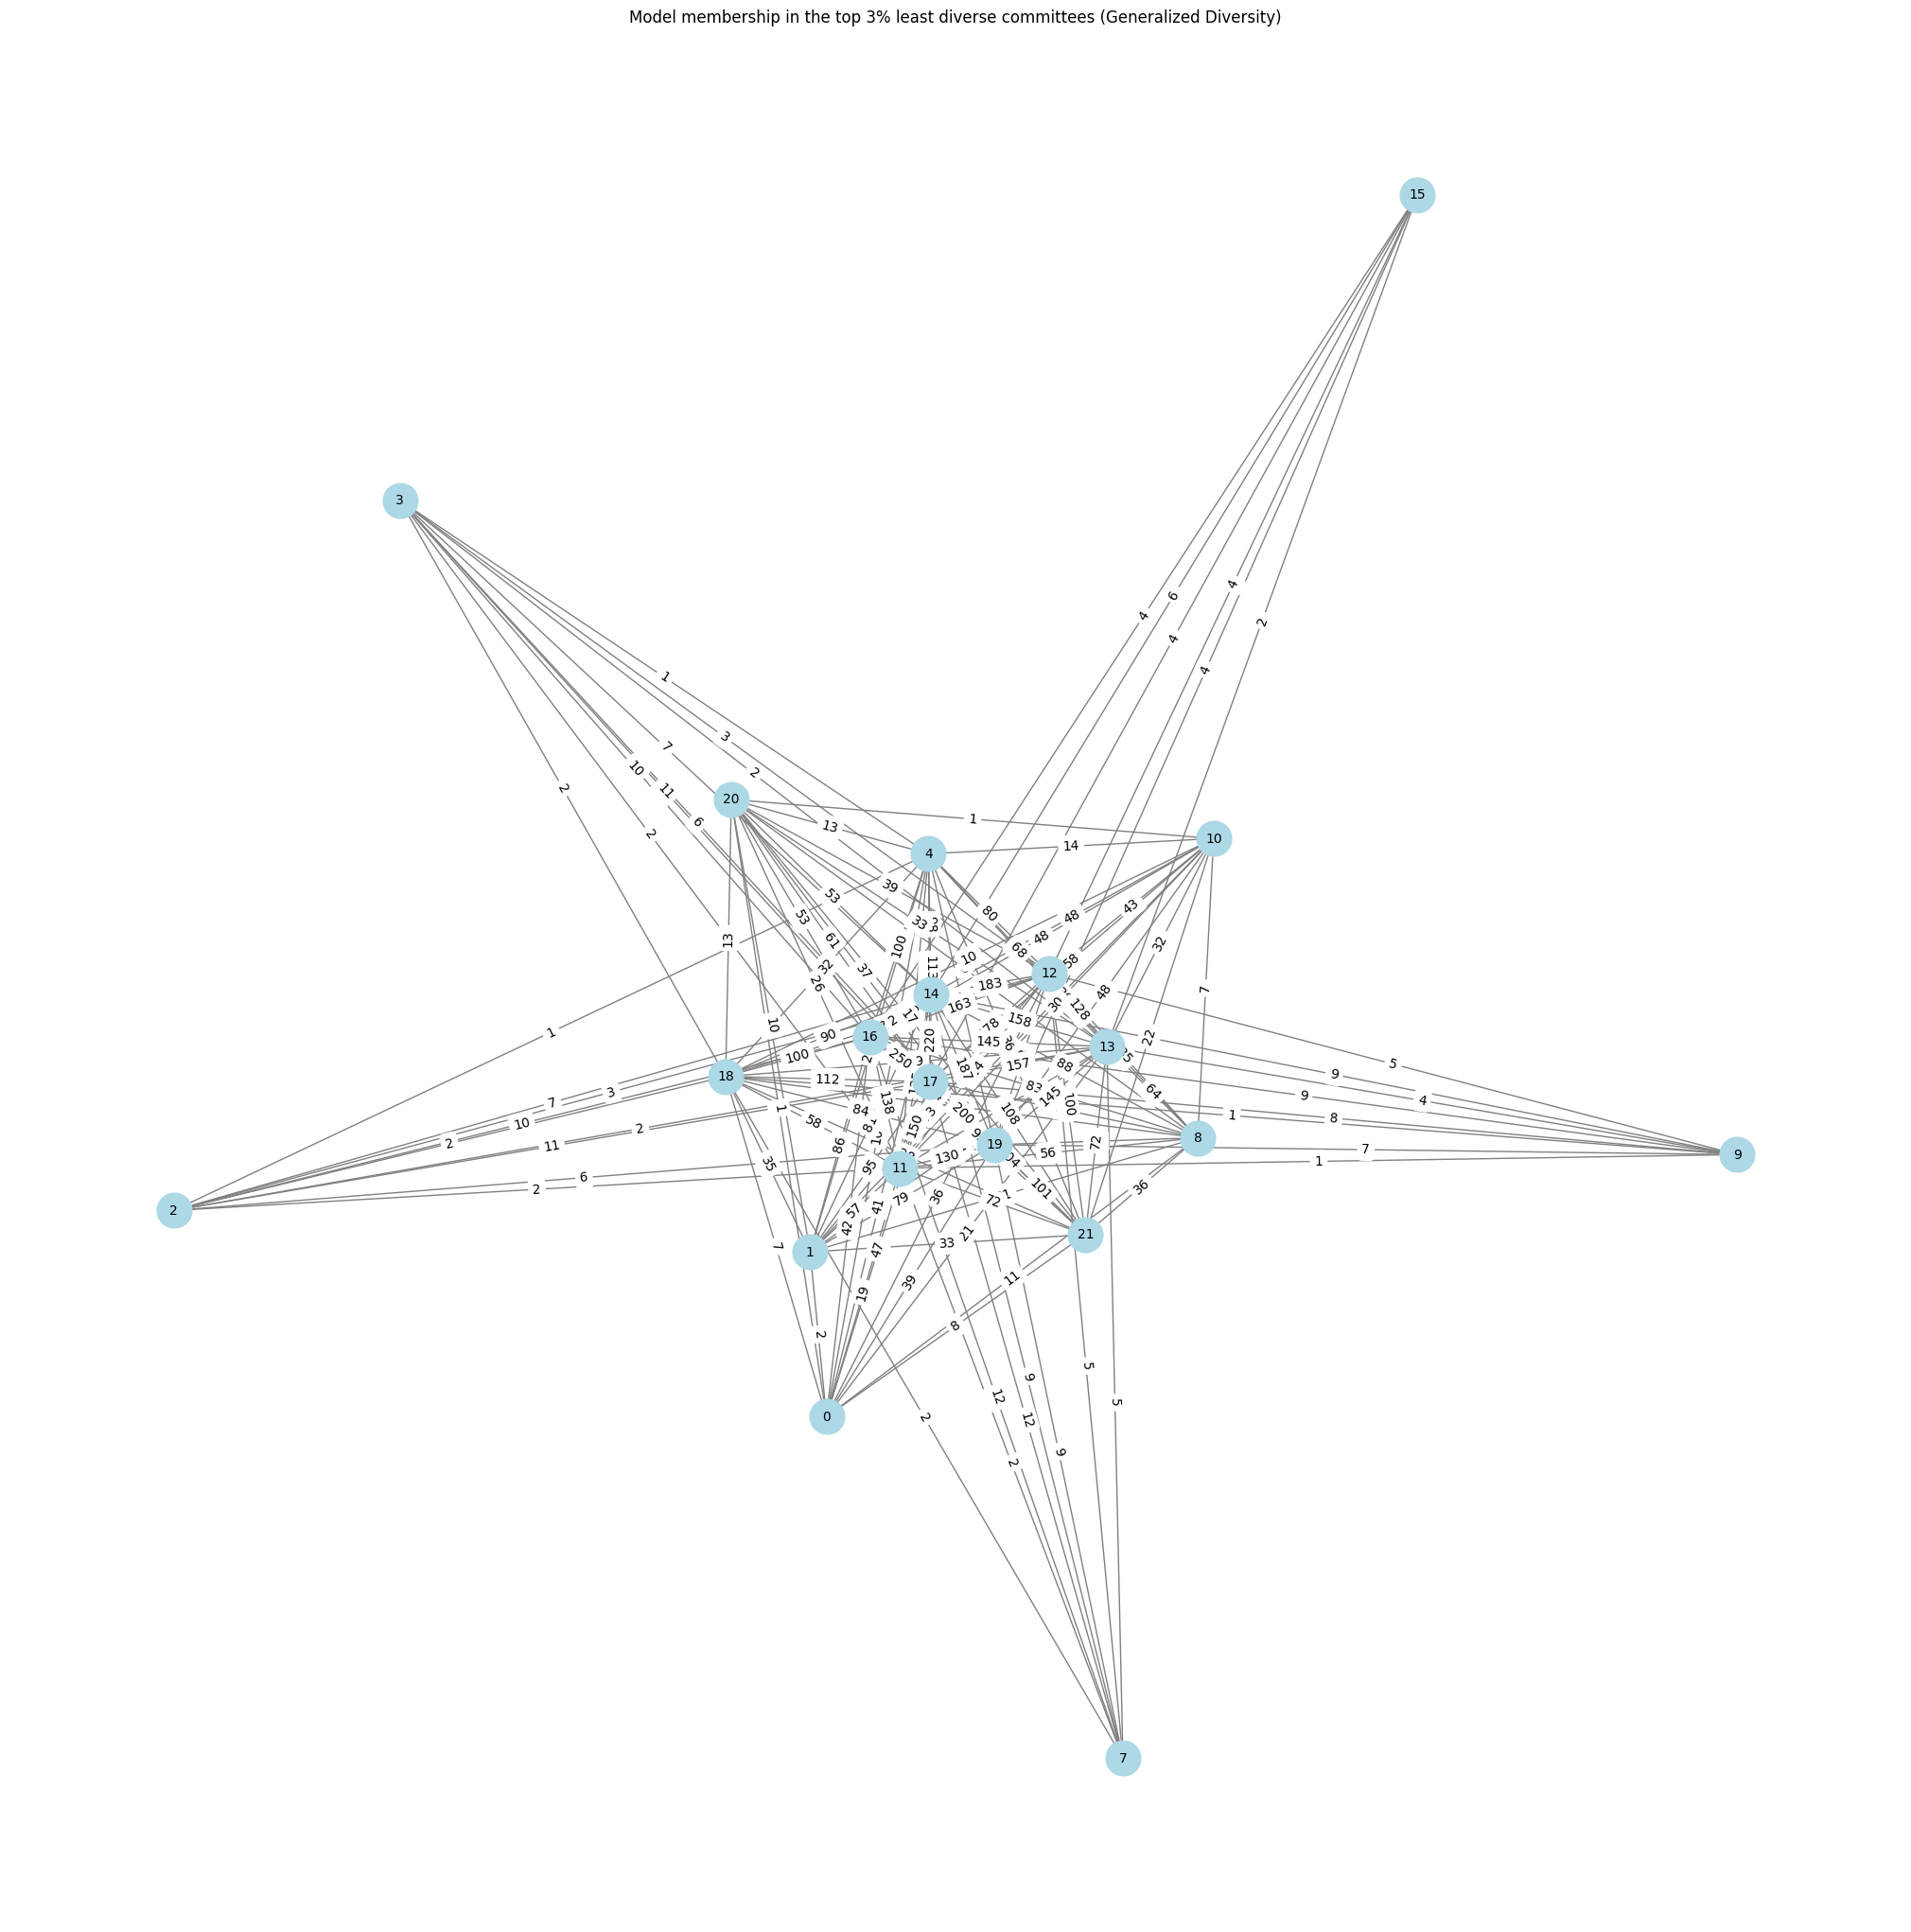

In [251]:
plt.figure(figsize=(20, 20))
G = nx.from_numpy_array(matrix_gd_min_n)

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes

# Draw nodes and edges
nx.draw(G, pos, with_labels=False, node_color='lightblue', node_size=700, edge_color='gray')

# Draw edge labels (weights)
lbs = {0:0,1:1,2:2,3:3,4:4,5:7,6:8,7:9,8:10,9:11,10:12,11:13,12:14,13:15,14:16,15:17,16:18,17:19,18:20,19:21}
edge_labels = nx.get_edge_attributes(G, 'weight')

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw_networkx_labels(G, pos, labels=lbs, font_size=10)

# Show plot
plt.title("Model membership in the top 3% least diverse committees (Generalized Diversity)")
plt.show()

In [18]:
# 3% komitetów które osiągnęły najmniejszą wartość entropy (indeksy)
ids_e_min = df1.sort_values(by = 'entropy', ascending=True).head(math.ceil(len(df1)*0.03)).index.to_list()
# wybranie tych komiteow
result_e_min = [comb_num[i] for i in ids_e_min]

matrix_e_min = np.zeros((22, 22), dtype=int)

for group in result_e_min:
    for i in group:
        for j in group:
            if i != j:
                matrix_e_min[i][j] += 1

# 3% komitetów które osiągnęły najwiekszą wartość entropy (indeksy)
ids_e_max = df1.sort_values(by = 'entropy', ascending=False).head(math.ceil(len(df1)*0.03)).index.to_list()
# wybranie tych komiteow
result_e_max = [comb_num[i] for i in ids_e_max]

matrix_e_max = np.zeros((22, 22), dtype=int)

for group in result_e_max:
    for i in group:
        for j in group:
            if i != j:
                matrix_e_max[i][j] += 1


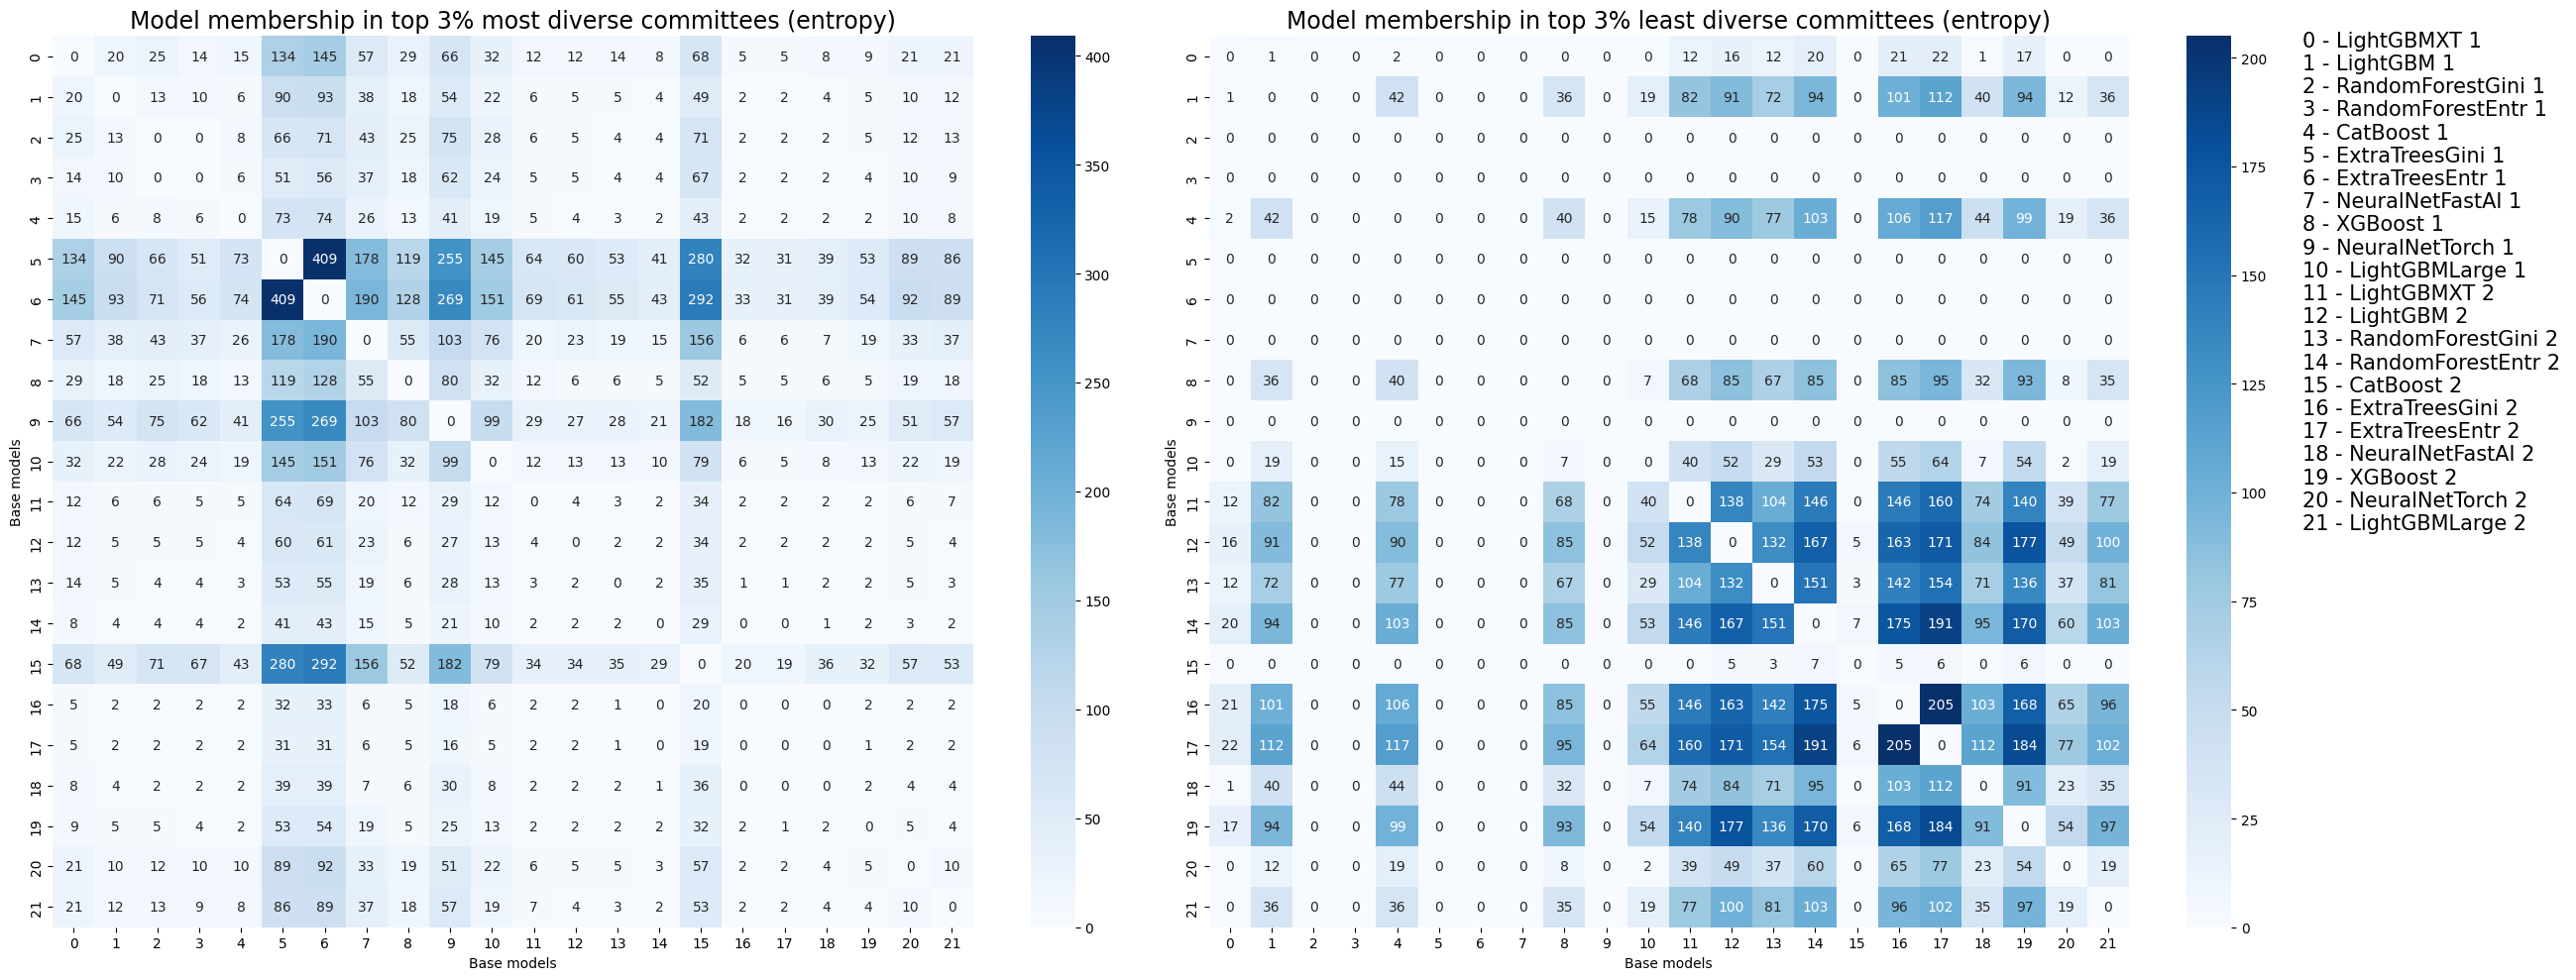

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(24, 10))  # 1 row, 2 columns

# Heatmap for least diverse committees
ax2 = sns.heatmap(matrix_e_min, annot=True, fmt='g', cmap="Blues", ax=axes[1])
ax2.set(xlabel="Base models", ylabel="Base models")
ax2.set_title('Model membership in top 3% least diverse committees (entropy)', fontsize=17)

# Add model legend text to the right of the first heatmap

# Heatmap for most diverse committees
ax1 = sns.heatmap(matrix_e_max, annot=True, fmt='g', cmap="Blues", ax=axes[0])
ax1.set(xlabel="Base models", ylabel="Base models")
ax1.set_title('Model membership in top 3% most diverse committees (entropy)', fontsize=17)
tekst = '0 - LightGBMXT 1 \n1 - LightGBM 1 \n2 - RandomForestGini 1 \n3 - RandomForestEntr 1 \n4 - CatBoost 1 \n5 - ExtraTreesGini 1 \n6 - ExtraTreesEntr 1 \n7 - NeuralNetFastAI 1 \n8 - XGBoost 1 \n9 - NeuralNetTorch 1 \n10 - LightGBMLarge 1 \n11 - LightGBMXT 2 \n12 - LightGBM 2 \n13 - RandomForestGini 2 \n14 - RandomForestEntr 2 \n15 - CatBoost 2 \n16 - ExtraTreesGini 2 \n17 - ExtraTreesEntr 2 \n18 - NeuralNetFastAI 2 \n19 - XGBoost 2 \n20 - NeuralNetTorch 2 \n21 - LightGBMLarge 2'
fig.text(0.97, 0.46, tekst, fontsize=15)

# Adjust layout to fit everything
plt.tight_layout()
plt.show()

In [19]:
# 3% komitetów które osiągnęły najmniejszą wartość ia (indeksy)
ids_ia_min = df1.sort_values(by = 'ia', ascending=True).head(math.ceil(len(df1)*0.03)).index.to_list()
# wybranie tych komiteow
result_ia_min = [comb_num[i] for i in ids_ia_min]

matrix_ia_min = np.zeros((22, 22), dtype=int)

for group in result_ia_min:
    for i in group:
        for j in group:
            if i != j:
                matrix_ia_min[i][j] += 1
# 3% komitetów które osiągnęły najmniejszą wartość ia (indeksy)
ids_ia_max = df1.sort_values(by = 'ia', ascending=False).head(math.ceil(len(df1)*0.03)).index.to_list()
# wybranie tych komiteow
result_ia_max = [comb_num[i] for i in ids_ia_max]

matrix_ia_max = np.zeros((22, 22), dtype=int)

for group in result_ia_max:
    for i in group:
        for j in group:
            if i != j:
                matrix_ia_max[i][j] += 1

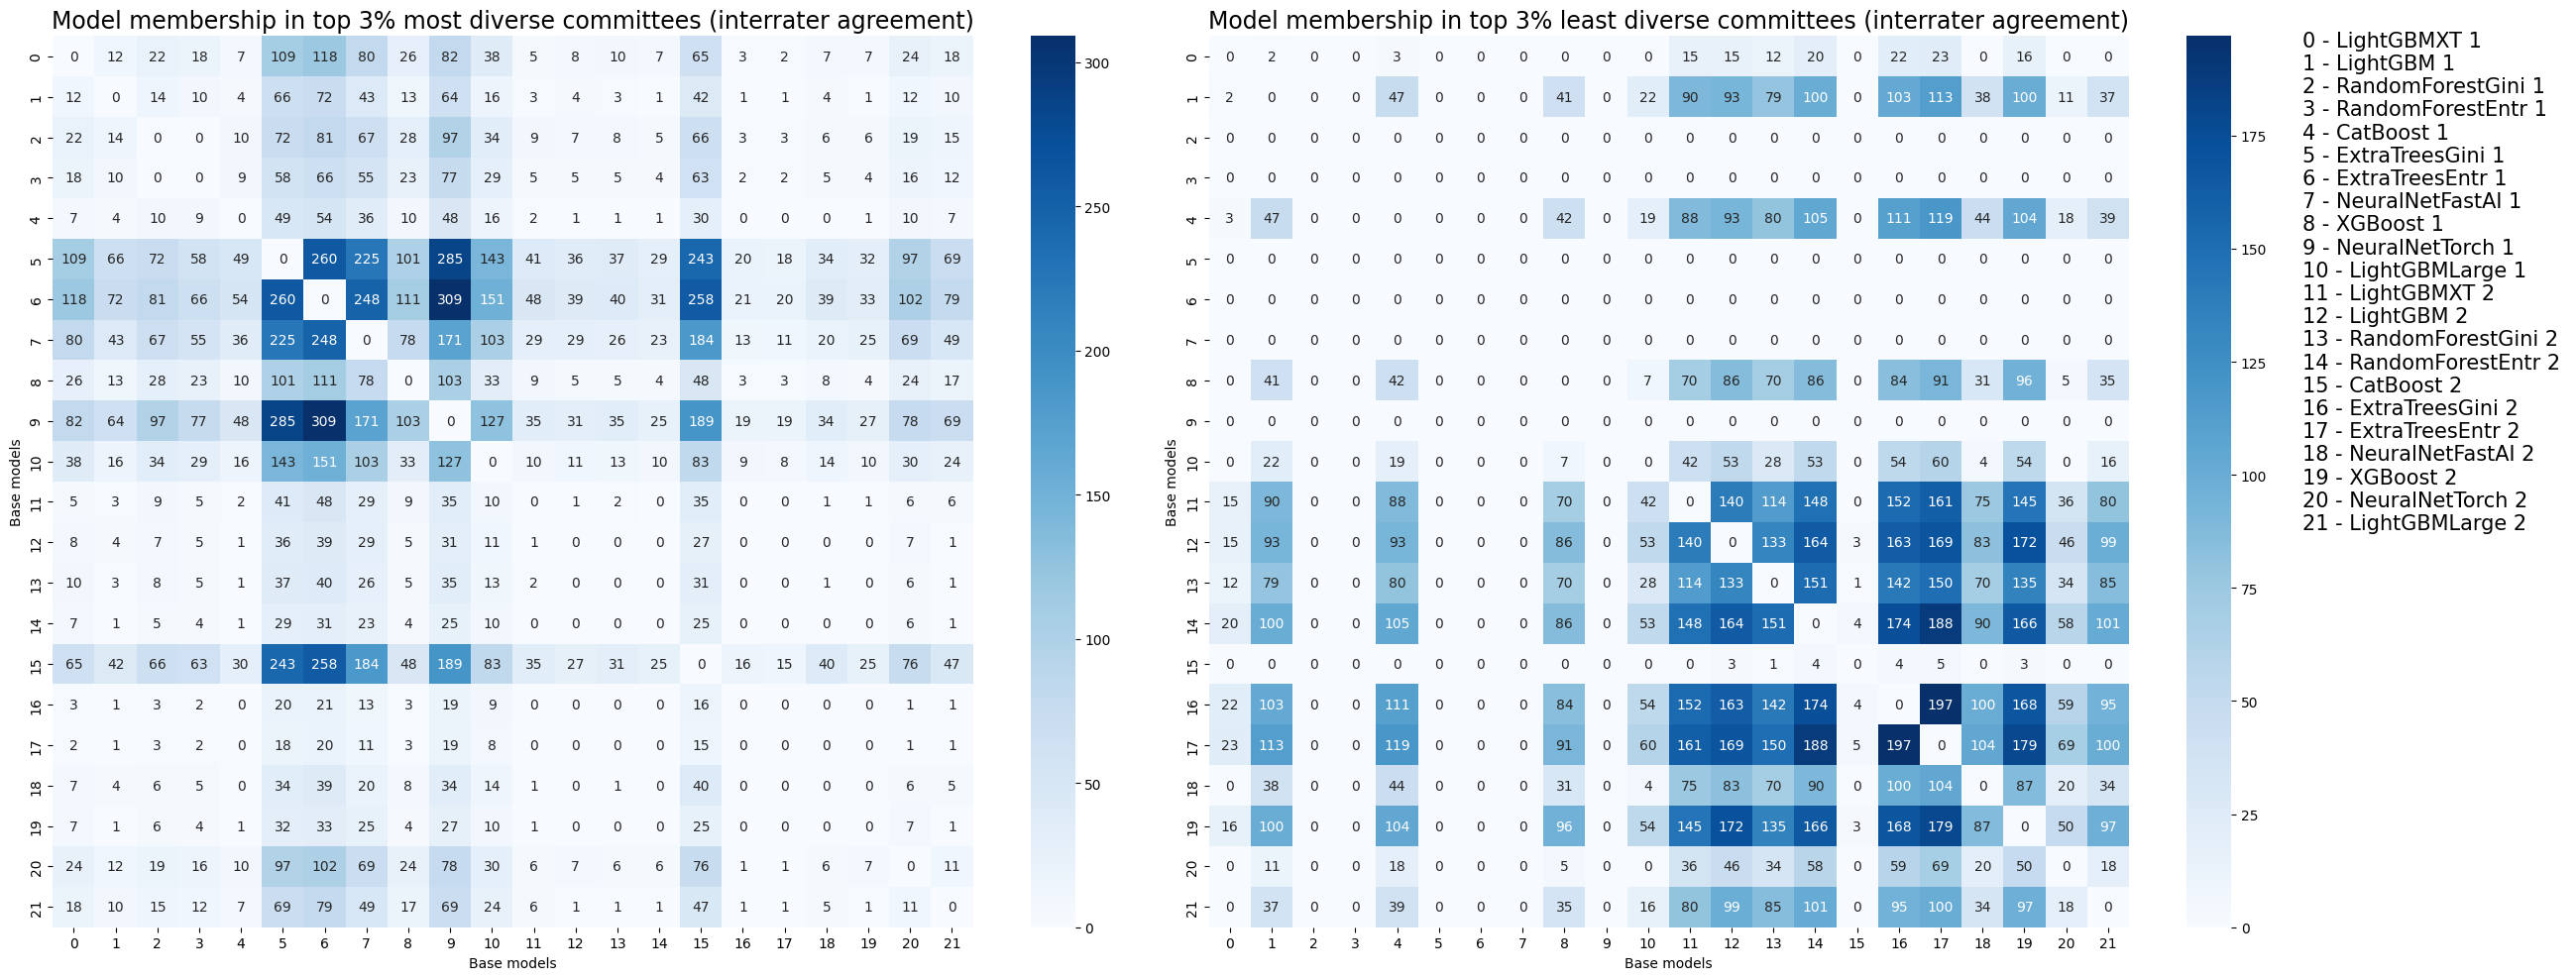

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(24, 10)) 

ax2 = sns.heatmap(matrix_ia_max, annot=True, fmt='g', cmap="Blues", ax=axes[1])
ax2.set(xlabel="Base models", ylabel="Base models")
ax2.set_title('Model membership in top 3% least diverse committees (interrater agreement)', fontsize=17)

ax1 = sns.heatmap(matrix_ia_min, annot=True, fmt='g', cmap="Blues", ax=axes[0])
ax1.set(xlabel="Base models", ylabel="Base models")
ax1.set_title('Model membership in top 3% most diverse committees (interrater agreement)', fontsize=17)

tekst = '0 - LightGBMXT 1 \n1 - LightGBM 1 \n2 - RandomForestGini 1 \n3 - RandomForestEntr 1 \n4 - CatBoost 1 \n5 - ExtraTreesGini 1 \n6 - ExtraTreesEntr 1 \n7 - NeuralNetFastAI 1 \n8 - XGBoost 1 \n9 - NeuralNetTorch 1 \n10 - LightGBMLarge 1 \n11 - LightGBMXT 2 \n12 - LightGBM 2 \n13 - RandomForestGini 2 \n14 - RandomForestEntr 2 \n15 - CatBoost 2 \n16 - ExtraTreesGini 2 \n17 - ExtraTreesEntr 2 \n18 - NeuralNetFastAI 2 \n19 - XGBoost 2 \n20 - NeuralNetTorch 2 \n21 - LightGBMLarge 2'
fig.text(0.97, 0.46, tekst, fontsize=15)
plt.tight_layout()
plt.show()

In [20]:
# 3% komitetów które osiągnęły najmniejszą wartość kw (indeksy)
ids_kw_min = df1.sort_values(by = 'kw', ascending=True).head(math.ceil(len(df1)*0.03)).index.to_list()
# wybranie tych komiteow
result_kw_min = [comb_num[i] for i in ids_kw_min]

matrix_kw_min = np.zeros((22, 22), dtype=int)

for group in result_kw_min:
    for i in group:
        for j in group:
            if i != j:
                matrix_kw_min[i][j] += 1
# 3% komitetów które osiągnęły najwieksza wartość kw (indeksy)
ids_kw_max = df1.sort_values(by = 'kw', ascending=False).head(math.ceil(len(df1)*0.03)).index.to_list()
# wybranie tych komiteow
result_kw_max = [comb_num[i] for i in ids_kw_max]

matrix_kw_max = np.zeros((22, 22), dtype=int)

for group in result_kw_max:
    for i in group:
        for j in group:
            if i != j:
                matrix_kw_max[i][j] += 1

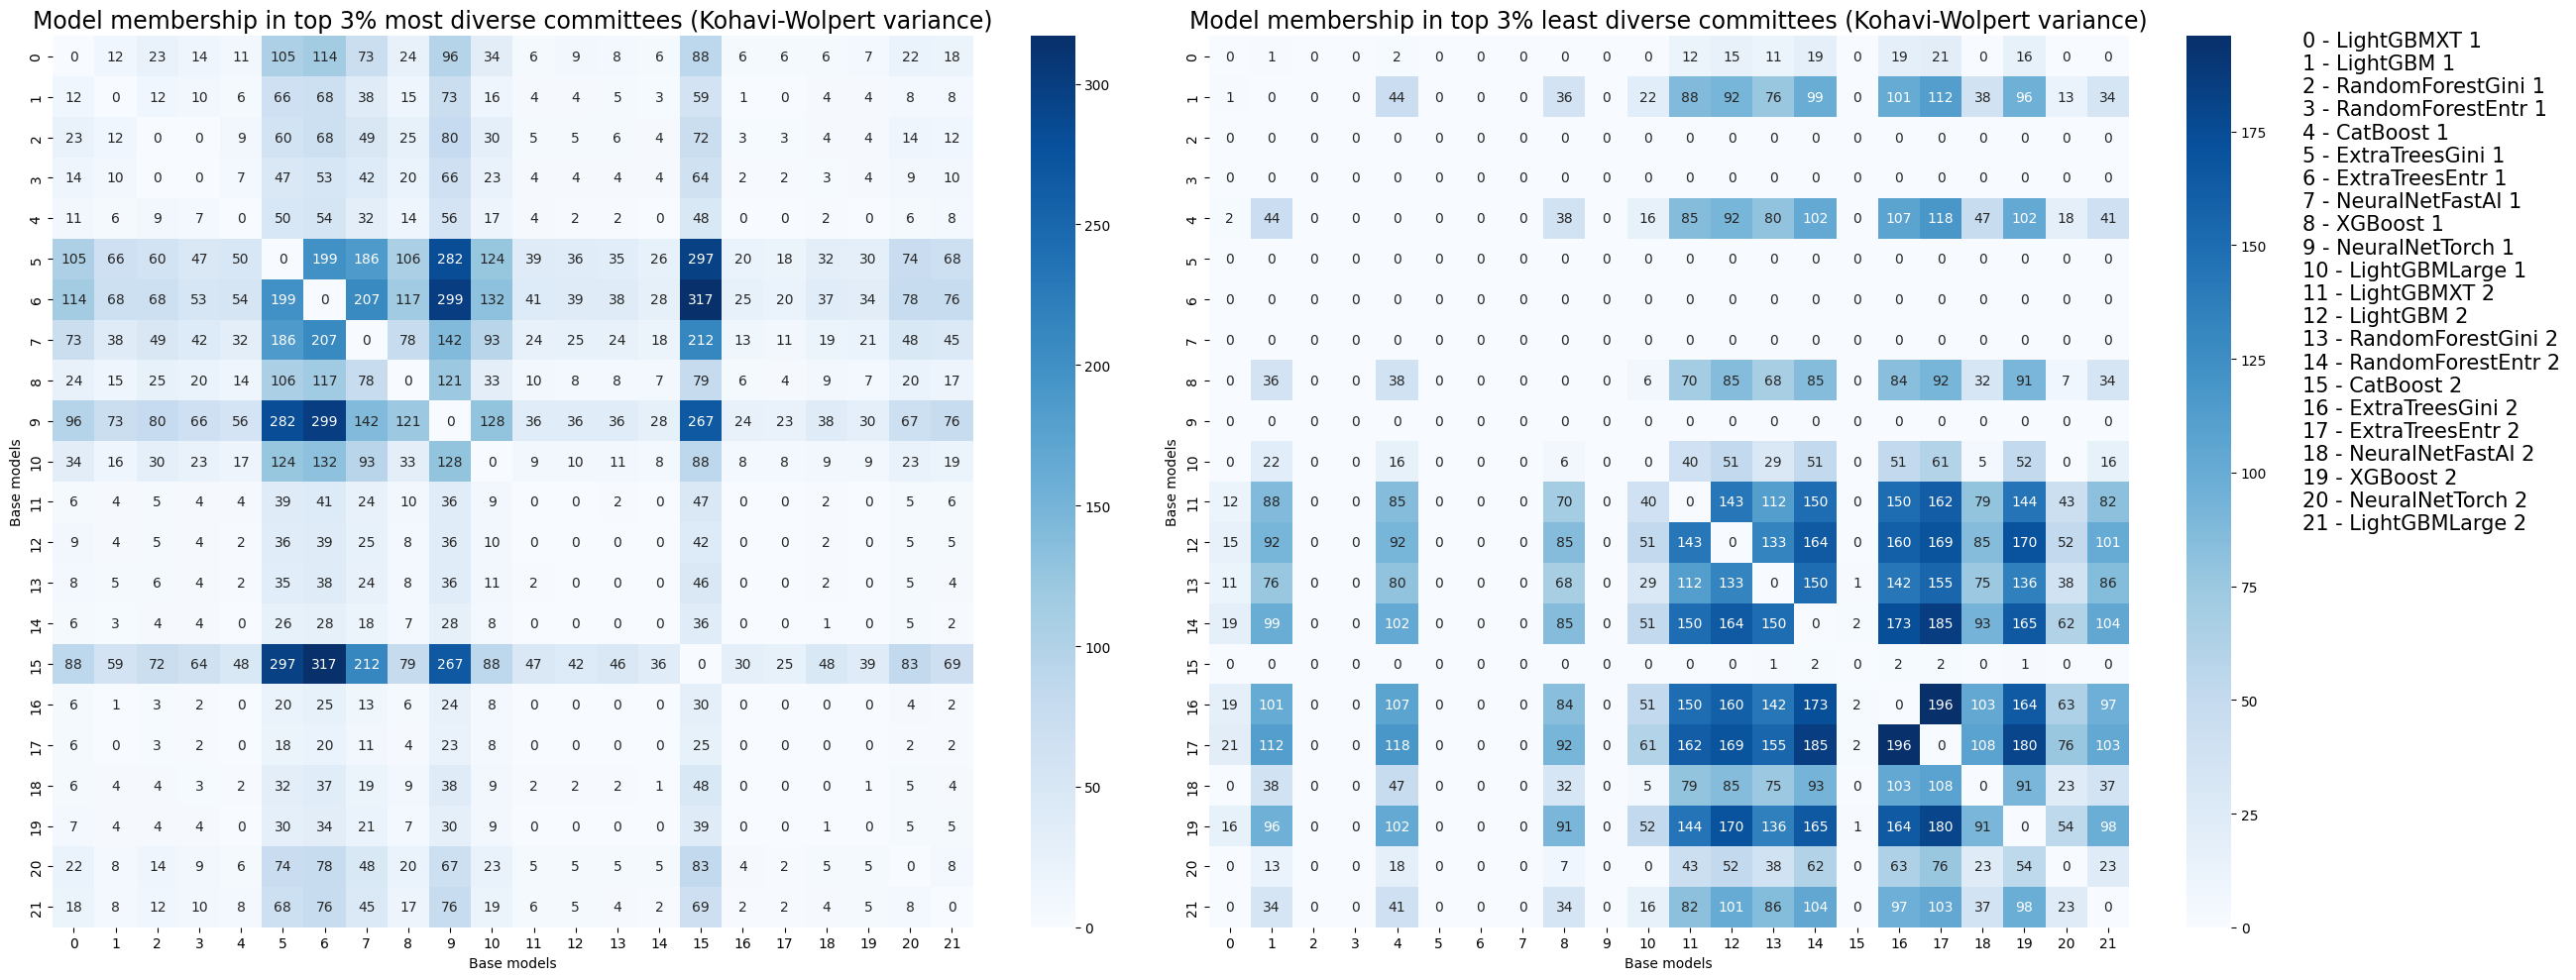

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(24, 10)) 

ax2 = sns.heatmap(matrix_kw_min, annot=True, fmt='g', cmap="Blues", ax=axes[1])
ax2.set(xlabel="Base models", ylabel="Base models")
ax2.set_title('Model membership in top 3% least diverse committees (Kohavi-Wolpert variance)', fontsize=17)

ax1 = sns.heatmap(matrix_kw_max, annot=True, fmt='g', cmap="Blues", ax=axes[0])
ax1.set(xlabel="Base models", ylabel="Base models")
ax1.set_title('Model membership in top 3% most diverse committees (Kohavi-Wolpert variance)', fontsize=17)

tekst = '0 - LightGBMXT 1 \n1 - LightGBM 1 \n2 - RandomForestGini 1 \n3 - RandomForestEntr 1 \n4 - CatBoost 1 \n5 - ExtraTreesGini 1 \n6 - ExtraTreesEntr 1 \n7 - NeuralNetFastAI 1 \n8 - XGBoost 1 \n9 - NeuralNetTorch 1 \n10 - LightGBMLarge 1 \n11 - LightGBMXT 2 \n12 - LightGBM 2 \n13 - RandomForestGini 2 \n14 - RandomForestEntr 2 \n15 - CatBoost 2 \n16 - ExtraTreesGini 2 \n17 - ExtraTreesEntr 2 \n18 - NeuralNetFastAI 2 \n19 - XGBoost 2 \n20 - NeuralNetTorch 2 \n21 - LightGBMLarge 2'
fig.text(0.97, 0.46, tekst, fontsize=15)
plt.tight_layout()
plt.show()

In [24]:
# 3% komitetów które osiągnęły najmniejszą wartość diff (indeksy)
ids_d_min = df1.sort_values(by = 'diffi', ascending=True).head(math.ceil(len(df1)*0.03)).index.to_list()
# wybranie tych komiteow
result_d_min = [comb_num[i] for i in ids_d_min]

matrix_d_min = np.zeros((22, 22), dtype=int)

for group in result_d_min:
    for i in group:
        for j in group:
            if i != j:
                matrix_d_min[i][j] += 1
        
# 3% komitetów które osiągnęły najwieksza wartość diff (indeksy)
ids_d_max = df1.sort_values(by = 'diffi', ascending=False).head(math.ceil(len(df1)*0.03)).index.to_list()
# wybranie tych komiteow
result_d_max = [comb_num[i] for i in ids_d_max]

matrix_d_max = np.zeros((22, 22), dtype=int)

for group in result_d_max:
    for i in group:
        for j in group:
            if i != j:
                matrix_d_max[i][j] += 1

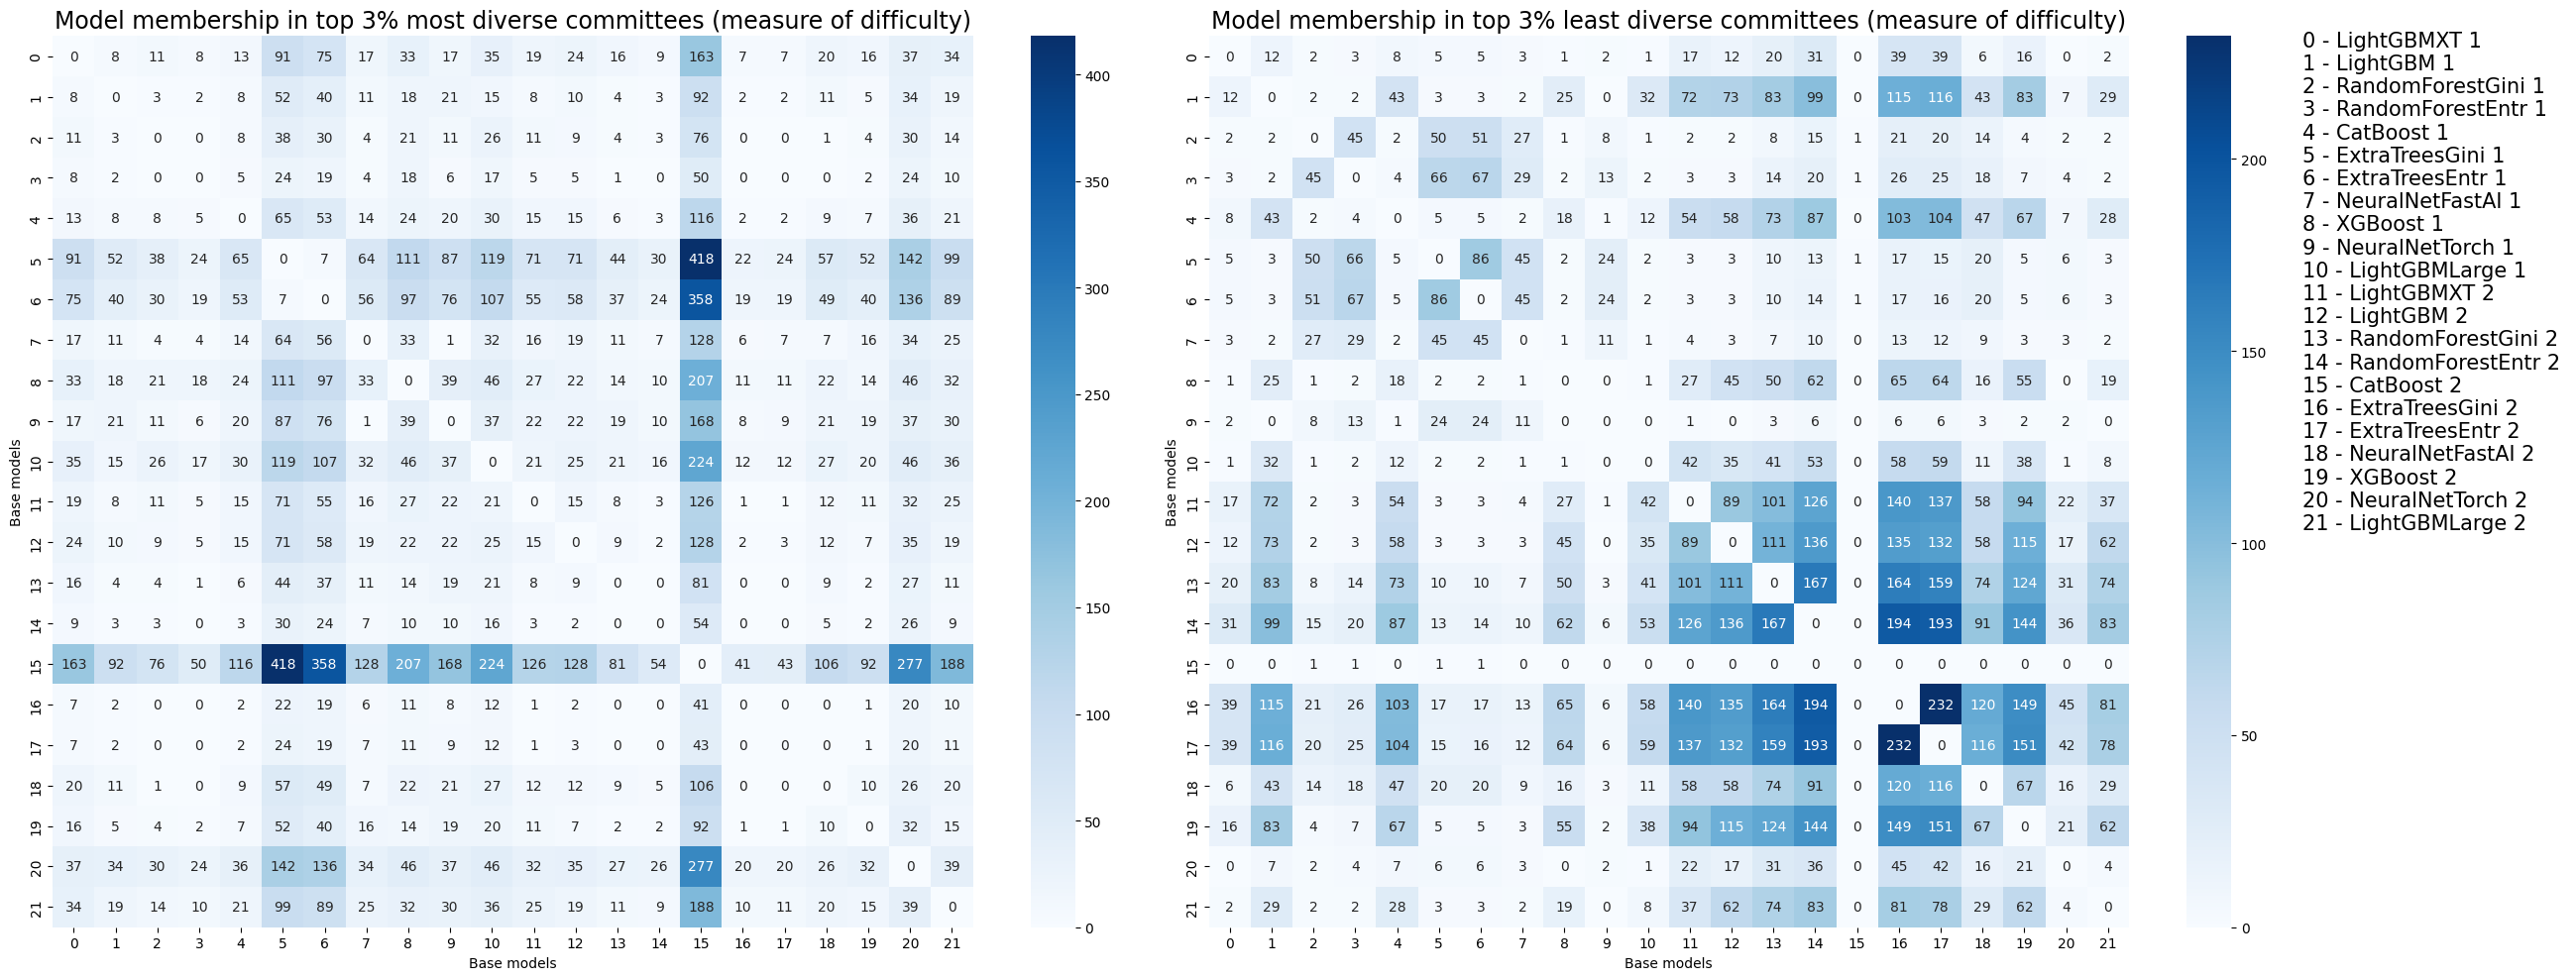

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(24, 10)) 

ax2 = sns.heatmap(matrix_d_max, annot=True, fmt='g', cmap="Blues", ax=axes[1])
ax2.set(xlabel="Base models", ylabel="Base models")
ax2.set_title('Model membership in top 3% least diverse committees (measure of difficulty)', fontsize=17)

ax1 = sns.heatmap(matrix_d_min, annot=True, fmt='g', cmap="Blues", ax=axes[0])
ax1.set(xlabel="Base models", ylabel="Base models")
ax1.set_title('Model membership in top 3% most diverse committees (measure of difficulty)', fontsize=17)

tekst = '0 - LightGBMXT 1 \n1 - LightGBM 1 \n2 - RandomForestGini 1 \n3 - RandomForestEntr 1 \n4 - CatBoost 1 \n5 - ExtraTreesGini 1 \n6 - ExtraTreesEntr 1 \n7 - NeuralNetFastAI 1 \n8 - XGBoost 1 \n9 - NeuralNetTorch 1 \n10 - LightGBMLarge 1 \n11 - LightGBMXT 2 \n12 - LightGBM 2 \n13 - RandomForestGini 2 \n14 - RandomForestEntr 2 \n15 - CatBoost 2 \n16 - ExtraTreesGini 2 \n17 - ExtraTreesEntr 2 \n18 - NeuralNetFastAI 2 \n19 - XGBoost 2 \n20 - NeuralNetTorch 2 \n21 - LightGBMLarge 2'
fig.text(0.97, 0.46, tekst, fontsize=15)
plt.tight_layout()
plt.show()

### Barplots

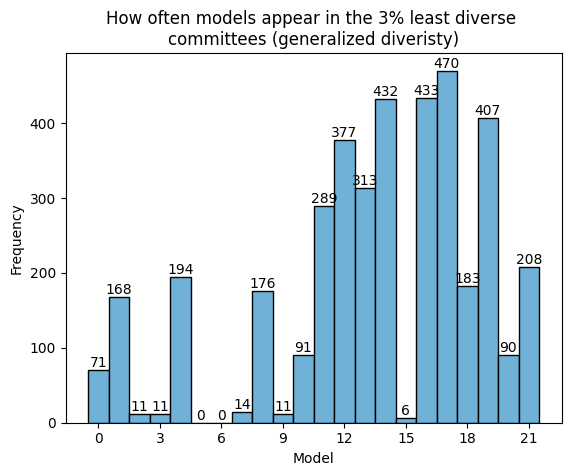

In [22]:
results_flat = [item for tup in result_gd_min for item in tup]
hist = Counter(results_flat)
counts, bins, patches = plt.hist(results_flat, bins=range(min(results_flat), max(results_flat)+2), align='left', edgecolor='black',color ='#70b1d7' )
plt.bar_label(patches, label_type='edge')
plt.xticks([i for i in range(0, 22, 3)])
plt.xlabel('Model')
plt.ylabel('Frequency')
plt.title('How often models appear in the 3% least diverse \ncommittees (generalized diveristy)')
plt.show()

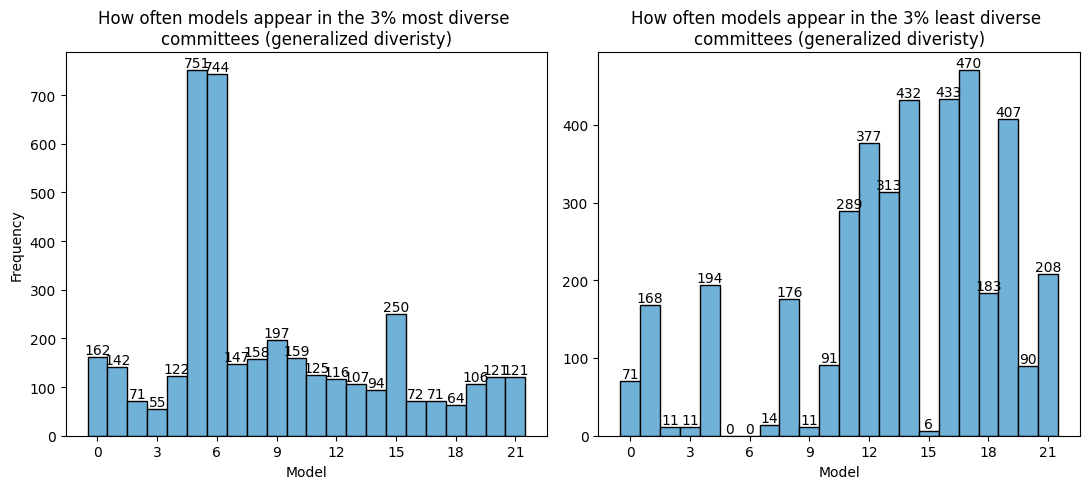

In [ ]:
results_flat1 = [item for tup in result_gd_min for item in tup]
results_flat2 = [item for tup in result_gd_max for item in tup]
tics = [i for i in range(0, 22, 3)]
fig, axs = plt.subplots(1, 2, figsize=(11, 5))

counts1, bins1, patches1 = axs[0].hist(results_flat2, bins=range(min(results_flat2), max(results_flat2)+2),
                                       align='left', edgecolor='black', color='#70b1d7')
axs[0].bar_label(patches1, label_type='edge')
axs[0].set_xticks(tics)
axs[0].set_xlabel('Model')
axs[0].set_ylabel('Frequency')
axs[0].set_title('How often models appear in the 3% most diverse \ncommittees (generalized diveristy)')

counts2, bins2, patches2 = axs[1].hist(results_flat1, bins=range(min(results_flat1), max(results_flat1)+2),
                                       align='left', edgecolor='black', color='#70b1d7')
axs[1].bar_label(patches2, label_type='edge')
axs[1].set_xticks(tics)
axs[1].set_xlabel('Model')
axs[1].set_title('How often models appear in the 3% least diverse \ncommittees (generalized diveristy)')

# Layout adjustment
plt.tight_layout()
plt.show()

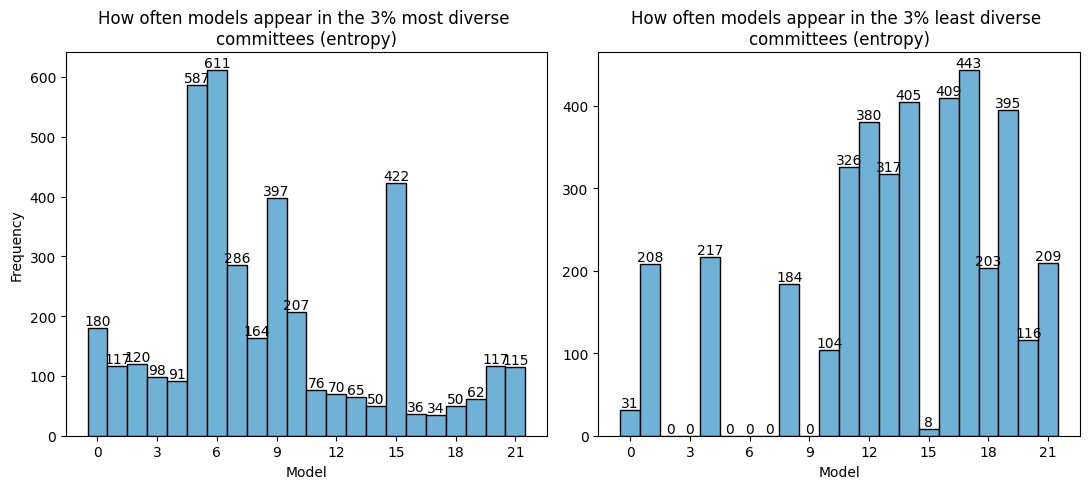

In [ ]:
results_flat1 = [item for tup in result_e_min for item in tup]
results_flat2 = [item for tup in result_e_max for item in tup]
tics = [i for i in range(0, 22, 3)]
fig, axs = plt.subplots(1, 2, figsize=(11, 5))

counts1, bins1, patches1 = axs[0].hist(results_flat2, bins=range(min(results_flat2), max(results_flat2)+2),
                                       align='left', edgecolor='black', color='#70b1d7')
axs[0].bar_label(patches1, label_type='edge')
axs[0].set_xticks(tics)
axs[0].set_xlabel('Model')
axs[0].set_ylabel('Frequency')
axs[0].set_title('How often models appear in the 3% most diverse \ncommittees (entropy)')

counts2, bins2, patches2 = axs[1].hist(results_flat1, bins=range(min(results_flat1), max(results_flat1)+2),
                                       align='left', edgecolor='black', color='#70b1d7')
axs[1].bar_label(patches2, label_type='edge')
axs[1].set_xticks(tics)
axs[1].set_xlabel('Model')
axs[1].set_title('How often models appear in the 3% least diverse \ncommittees (entropy)')

plt.tight_layout()
plt.show()

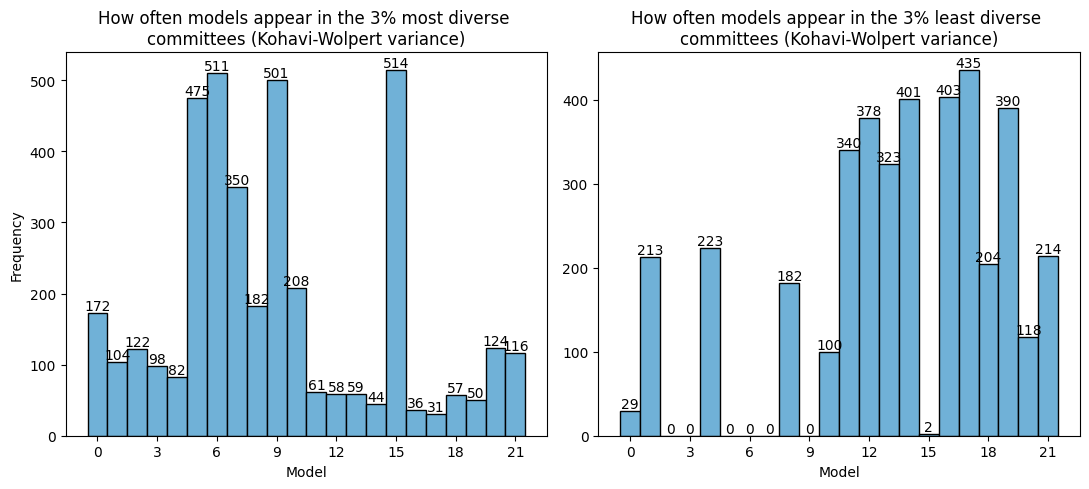

In [ ]:
results_flat1 = [item for tup in result_kw_min for item in tup]
results_flat2 = [item for tup in result_kw_max for item in tup]
tics = [i for i in range(0, 22, 3)]
fig, axs = plt.subplots(1, 2, figsize=(11, 5))

counts1, bins1, patches1 = axs[0].hist(results_flat2, bins=range(min(results_flat2), max(results_flat2)+2),
                                       align='left', edgecolor='black', color='#70b1d7')
axs[0].bar_label(patches1, label_type='edge')
axs[0].set_xticks(tics)
axs[0].set_xlabel('Model')
axs[0].set_ylabel('Frequency')
axs[0].set_title('How often models appear in the 3% most diverse \ncommittees (Kohavi-Wolpert variance)')

counts2, bins2, patches2 = axs[1].hist(results_flat1, bins=range(min(results_flat1), max(results_flat1)+2),
                                       align='left', edgecolor='black', color='#70b1d7')
axs[1].bar_label(patches2, label_type='edge')
axs[1].set_xticks(tics)
axs[1].set_xlabel('Model')
axs[1].set_title('How often models appear in the 3% least diverse \ncommittees (Kohavi-Wolpert variance)')

# Layout adjustment
plt.tight_layout()
plt.show()

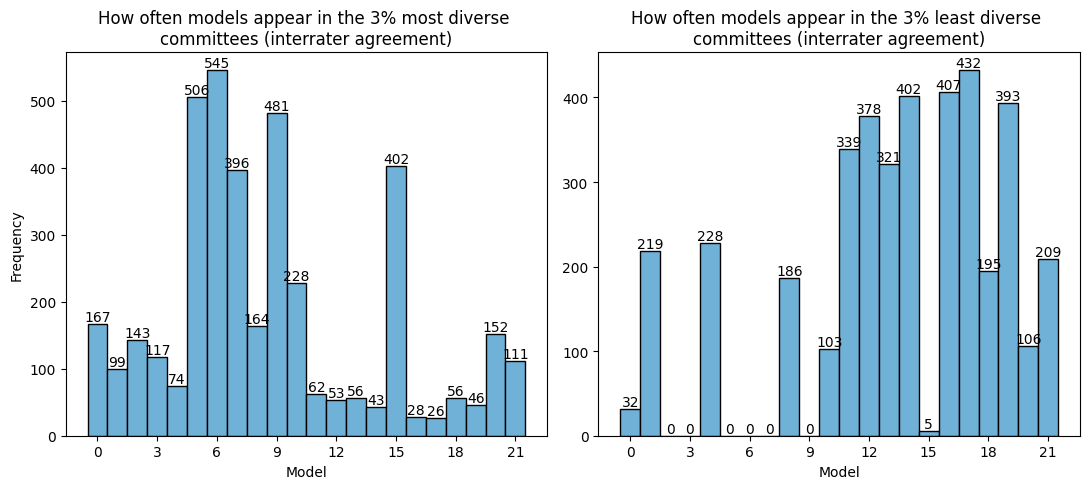

In [ ]:
results_flat1 = [item for tup in result_ia_max for item in tup]
results_flat2 = [item for tup in result_ia_min for item in tup]
tics = [i for i in range(0, 22, 3)]
fig, axs = plt.subplots(1, 2, figsize=(11, 5))

counts1, bins1, patches1 = axs[0].hist(results_flat2, bins=range(min(results_flat2), max(results_flat2)+2),
                                       align='left', edgecolor='black', color='#70b1d7')
axs[0].bar_label(patches1, label_type='edge')
axs[0].set_xticks(tics)
axs[0].set_xlabel('Model')
axs[0].set_ylabel('Frequency')
axs[0].set_title('How often models appear in the 3% most diverse \ncommittees (interrater agreement)')

counts2, bins2, patches2 = axs[1].hist(results_flat1, bins=range(min(results_flat1), max(results_flat1)+2),
                                       align='left', edgecolor='black', color='#70b1d7')
axs[1].bar_label(patches2, label_type='edge')
axs[1].set_xticks(tics)
axs[1].set_xlabel('Model')
axs[1].set_title('How often models appear in the 3% least diverse \ncommittees (interrater agreement)')

plt.tight_layout()
plt.show()

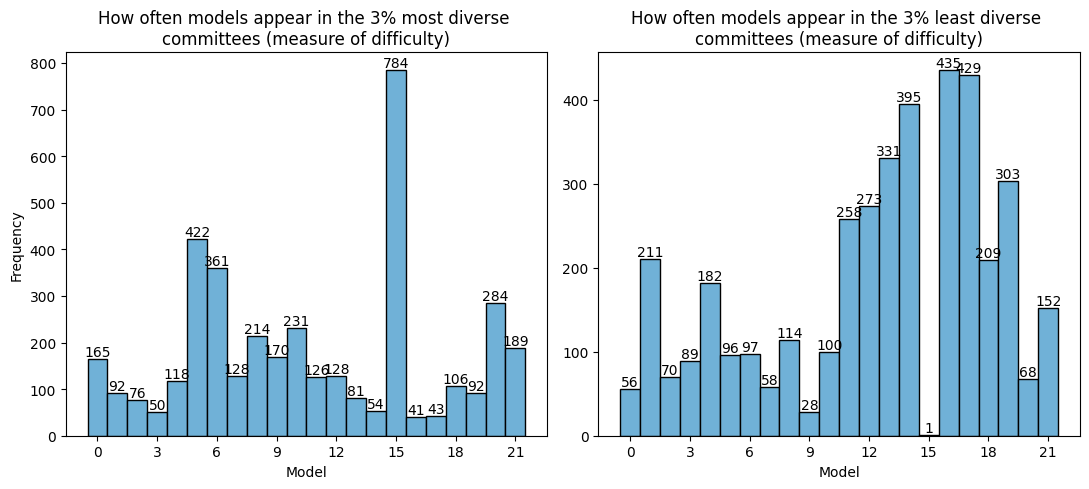

In [27]:
results_flat1 = [item for tup in result_d_min for item in tup]
results_flat2 = [item for tup in result_d_max for item in tup]
tics = [i for i in range(0, 22, 3)]
fig, axs = plt.subplots(1, 2, figsize=(11, 5))

counts1, bins1, patches1 = axs[0].hist(results_flat1, bins=range(min(results_flat2), max(results_flat2)+2),
                                       align='left', edgecolor='black', color='#70b1d7')
axs[0].bar_label(patches1, label_type='edge')
axs[0].set_xticks(tics)
axs[0].set_xlabel('Model')
axs[0].set_ylabel('Frequency')
axs[0].set_title('How often models appear in the 3% most diverse \ncommittees (measure of difficulty)')

counts2, bins2, patches2 = axs[1].hist(results_flat2, bins=range(min(results_flat1), max(results_flat1)+2),
                                       align='left', edgecolor='black', color='#70b1d7')
axs[1].bar_label(patches2, label_type='edge')
axs[1].set_xticks(tics)
axs[1].set_xlabel('Model')
axs[1].set_title('How often models appear in the 3% least diverse \ncommittees (measure of difficulty)')

plt.tight_layout()
plt.show()

In [ ]:
df = pd.DataFrame(co_matrix)
df_long = df.stack().reset_index()
df_long.columns = ['from', 'to', 'value']

df_long = df_long[(df_long['value'] > 0) & (df_long['from'] != df_long['to'])]

df_long['from'] = df_long['from'].apply(lambda x: f"group{x}")
df_long['to']   = df_long['to'].apply(lambda x: f"group{x}")

df_long.reset_index(drop=True, inplace=True)

In [ ]:
df_long

In [ ]:
df_long.to_csv('vertexdf.csv', index=False)  

### Boxplots

In [ ]:
np.var(df1)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


acc        0.000007
recall     0.000139
prec       0.000046
auc        0.000004
bal_acc    0.000030
gd         0.000661
entropy    0.000167
ia         0.000033
kw         0.000011
diffi      0.000002
dtype: float64

In [14]:
np.var(df_indiv)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


acc        0.000063
recall     0.001264
prec       0.000374
auc        0.000062
bal_acc    0.000272
dtype: float64

[Text(0.5, 1.0, 'Distribution of performance metrics on test set'),
 Text(0.5, 0, 'performance metric'),
 Text(0, 0.5, 'value')]

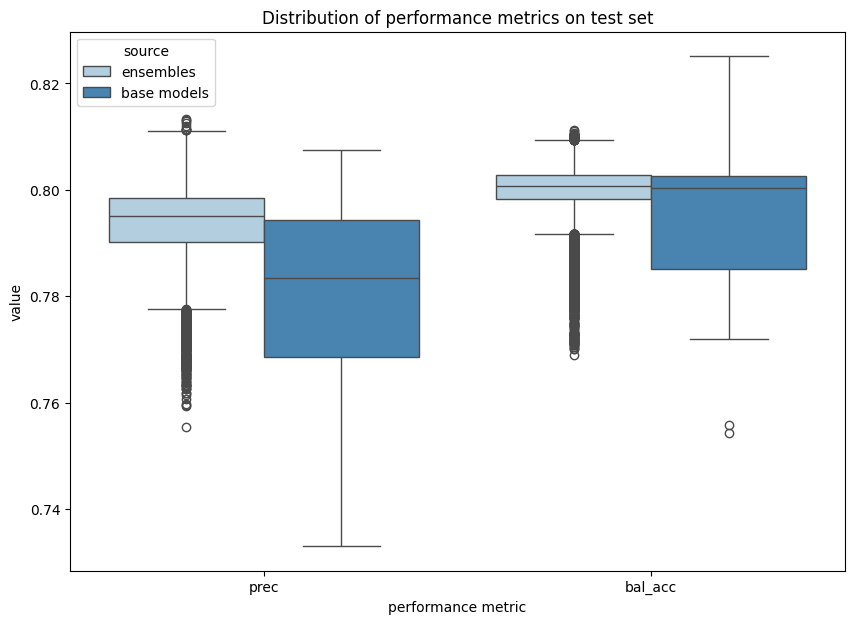

In [12]:
plt.figure(figsize=(10, 7))
df = pd.concat({'ensembles': df1[['prec', 'bal_acc']].melt(), 'base models': df_indiv[['prec', 'bal_acc']].melt()}, names=['source', 'old_index'])
# convert the source index to a column, and reset the old index
df = df.reset_index(level=0).reset_index(drop=True)

sns.boxplot(data=df, x='variable', y='value', hue='source', palette = 'Blues').set(title = "Distribution of performance metrics on test set",  xlabel='performance metric', ylabel='value')

[Text(0.5, 1.0, 'Distribution of accuracy on test set'),
 Text(0, 0.5, 'value'),
 Text(0.5, 0, 'performance metric')]

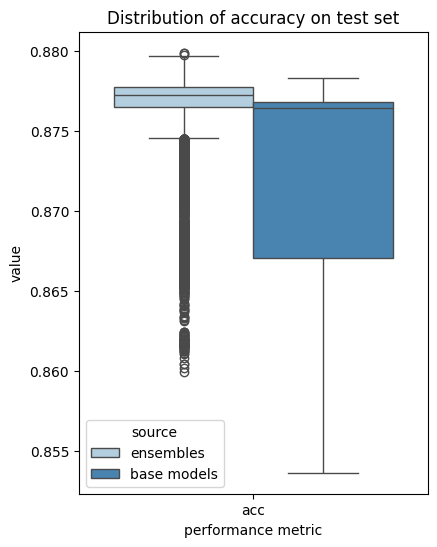

In [91]:
plt.figure(figsize=(4.5, 6))
df = pd.concat({'ensembles': df1[['acc']].melt(), 'base models': df_indiv[['acc']].melt()}, names=['source', 'old_index'])
# convert the source index to a column, and reset the old index
df = df.reset_index(level=0).reset_index(drop=True)

sns.boxplot(data=df, x='variable', y='value', hue='source',palette = 'Blues').set(title = "Distribution of accuracy on test set", ylabel='value', xlabel = 'performance metric')

[Text(0.5, 1.0, 'Distribution of AUC on test set'),
 Text(0, 0.5, 'value'),
 Text(0.5, 0, 'performance metric')]

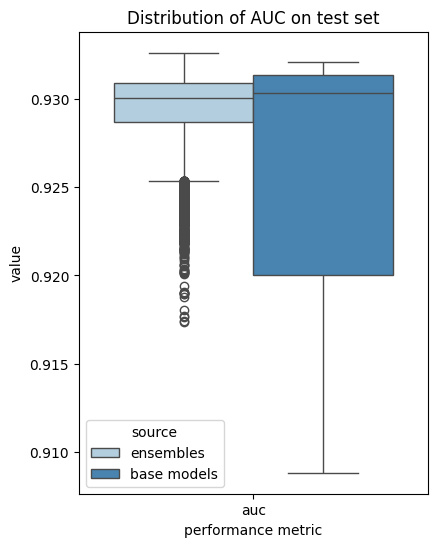

In [93]:
plt.figure(figsize=(4.5, 6))
df = pd.concat({'ensembles': df1[['auc']].melt(), 'base models': df_indiv[['auc']].melt()}, names=['source', 'old_index'])
# convert the source index to a column, and reset the old index
df = df.reset_index(level=0).reset_index(drop=True)

sns.boxplot(data=df, x='variable', y='value', hue='source',palette = 'Blues').set(title = "Distribution of AUC on test set", ylabel='value', xlabel = 'performance metric')

[Text(0.5, 1.0, 'Distribution of recall on test set'),
 Text(0, 0.5, 'value'),
 Text(0.5, 0, 'performance metric')]

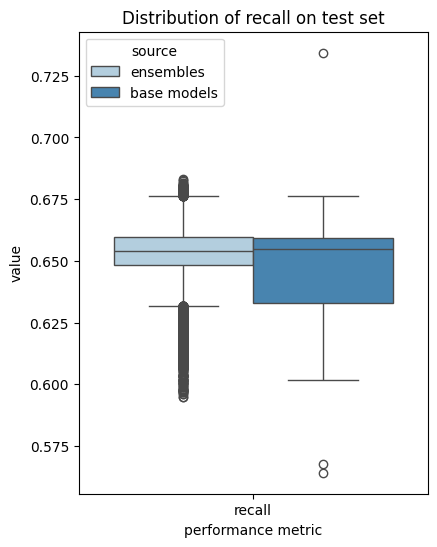

In [29]:
plt.figure(figsize=(4.5, 6))
df = pd.concat({'ensembles': df1[['recall']].melt(), 'base models': df_indiv[['recall']].melt()}, names=['source', 'old_index'])
# convert the source index to a column, and reset the old index
df = df.reset_index(level=0).reset_index(drop=True)

sns.boxplot(data=df, x='variable', y='value', hue='source',palette = 'Blues').set(title = "Distribution of recall on test set", ylabel='value', xlabel = 'performance metric')